# 구글 드라이브 마운트

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/project')

Mounted at /content/drive


# 라이브러리

In [2]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 25.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
# WordCloud
from collections import Counter
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# 데이터 불러오기

In [ ]:
data = pd.read_csv('data/final_data.csv')
data

Year  Month  Week  Rank              Title  \
0      2014      1     2     1        The Monster   
1      2014      1     2     2             Timber   
2      2014      1     2     3     Counting Stars   
3      2014      1     2     4             Royals   
4      2014      1     2     5      Say Something   
...     ...    ...   ...   ...                ...   
52095  2023     12     5    96  Winter Wonderland   
52096  2023     12     5    97  Run For The Hills   
52097  2023     12     5    98           Que Onda   
52098  2023     12     5    99       Great Gatsby   
52099  2023     12     5   100   One Of The Girls   

                                       Artist  \
0                    Eminem Featuring Rihanna   
1                     Pitbull Featuring Ke$ha   
2                                 OneRepublic   
3                                       Lorde   
4      A Great Big World & Christina Aguilera   
...                                       ...   
52095                                   Chloe   
52096                              Tate McRae   
52097  Calle 24 x Chino Pacas x Fuerza Regida   
52098                                Rod Wave   
52099     The Weeknd, Jennie & Lily Rose Depp   

                                                  Lyrics               Genre  \
0      I'm friends with the monster\nThat's under my ...                랩/힙합   
1      It's going down, I'm yelling timber\nYou bette...                 POP   
2      Lately, I've been, I've been losing sleep\nDre...                랩/힙합   
3      I've never seen a diamond in the flesh \nI cut...           POP, 록/메탈   
4      Say something, I'm giving up on you\nI'll be t...                 발라드   
...                                                  ...                 ...   
52095  [Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk...  재즈, 보컬재즈, 애시드/퓨전/팝   
52096  Hotels, late nights, hands through my hair\nLo...                 POP   
52097  Baby, me vuelves loco\r\nNo se esperó al hotel...            월드뮤직, 라틴   
52098  (Pipe that shit up, TnT)\n(Trill got that juic...                 POP   
52099  Lock me up and throw away the key\r\nHe knows ...     R&B/Soul, 국외드라마   

           BPM  Duration_sec                 color1                    color2  \
0      110.009       251.246     Purple Medium Dark         Cyan Muted Medium   
1      129.992       204.160        Blue Muted Dark        Blue Medium Medium   
2      122.013       257.840      Orange Muted Dark        Orange Medium Dark   
3       84.876       190.185   Red Medium Very Dark       Red Muted Very Dark   
4      141.284       229.400        Blue Muted Dark     Yellow Vibrant Medium   
...        ...           ...                    ...                       ...   
52095   77.810      1037.907    Blue Vibrant Medium           Blue Muted Dark   
52096  129.918       143.940    Red Muted Very Dark  Purple Vibrant Very Dark   
52097  125.012       189.426  Blue Medium Very Dark         Blue Medium Light   
52098  156.975       146.752        Red Muted Light         Red Medium Medium   
52099   84.828       244.685  Cyan Medium Very Dark        Red Vibrant Medium   

                        color3             rgb1             rgb2  \
0           Cyan Vibrant Light   (186, 97, 156)    (39, 83, 108)   
1          Blue Vibrant Medium     (18, 22, 36)    (60, 98, 156)   
2      Orange Medium Very Dark     (82, 68, 48)  (201, 171, 129)   
3             Red Vibrant Dark  (151, 123, 112)     (47, 39, 32)   
4             Cyan Medium Dark     (33, 39, 67)  (241, 244, 229)   
...                        ...              ...              ...   
52095     Red Medium Very Dark  (200, 215, 236)     (55, 67, 84)   
52096          Red Medium Dark     (31, 30, 30)  (191, 187, 195)   
52097         Blue Medium Dark  (161, 163, 191)    (30, 57, 153)   
52098  Yellow Medium Very Dark     (54, 32, 13)   (176, 111, 58)   
52099        Cyan Vibrant Dark     (71, 83, 80)  (222, 157, 149)   

                  rgb3  Featur

In [ ]:
data[data.Title == 'Linus And Lucy (Peanuts Theme)']

Year  Month  Week  Rank                           Title  \
41636  2022      1     1    37  Linus And Lucy (Peanuts Theme)   
46848  2022     12     5    49  Linus And Lucy (Peanuts Theme)   

                    Artist Lyrics Genre     BPM  Duration_sec  \
41636  Vince Guaraldi Trio    NaN  국외영화  81.675       184.613   
46848  Vince Guaraldi Trio    NaN  국외영화  81.675       184.613   

                   color1               color2           color3  \
41636  Cyan Medium Medium  Orange Vibrant Dark  Cyan Muted Dark   
46848  Cyan Medium Medium  Orange Vibrant Dark  Cyan Muted Dark   

                 rgb1             rgb2          rgb3  Featuring  
41636  (55, 107, 137)  (226, 215, 188)  (29, 51, 59)        0.0  
46848  (55, 107, 137)  (226, 215, 188)  (29, 51, 59)        0.0

In [ ]:
data.iloc[41636, 6] = '  '
data.iloc[46848, 6] = '  '

In [ ]:
tfidf = pd.read_csv('tf_idf.csv').drop(columns = 'Unnamed: 0')
tfidf

year  month  doc_num  keyword  TF-IDF
0       2014      1        0       oh  0.2893
1       2014      1        0    crazy  0.2816
2       2014      1        0  monster  0.2603
3       2014      1        1  wooooah  0.6140
4       2014      1        1   timber  0.5372
...      ...    ...      ...      ...     ...
312539  2023     12      498  century  0.3035
312540  2023     12      498    threw  0.2936
312541  2023     12      499    gotta  0.4548
312542  2023     12      499  tonight  0.3579
312543  2023     12      499     love  0.2931

[312544 rows x 5 columns]

* neg: 부정 점수
* neu: 중립 점수
* pos: 긍정 점수
* compound: 종합 점수

# 감성 점수 분포

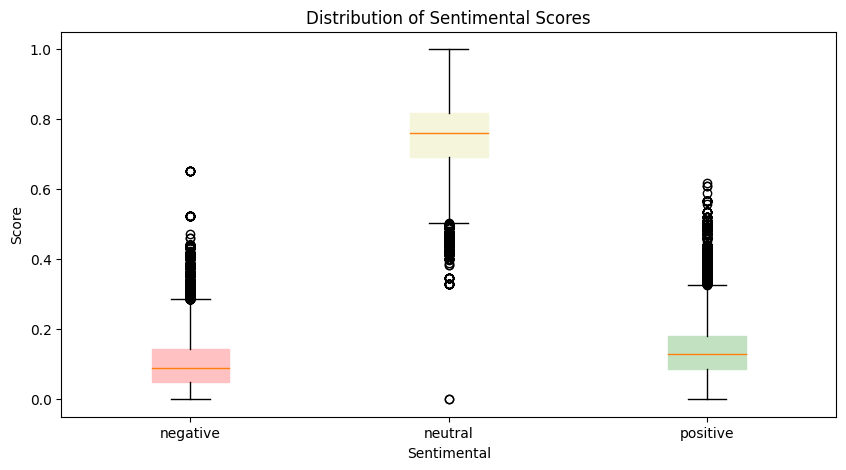

In [ ]:
idx = np.arange(1, 4)
labels = ['negative', 'neutral', 'positive']

plt.figure(figsize = (10, 5))
box_plots = plt.boxplot([lyrics['neg'], lyrics['neu'],lyrics['pos']], patch_artist = True)

colors = ['#FFC1C1', '#F5F5DC', '#C1E1C1']
for patch, color in zip(box_plots['boxes'], colors):
    patch.set_color(color)

plt.xticks(idx, labels)
plt.xlabel('Sentimental')
plt.ylabel('Score')
plt.title('Distribution of Sentimental Scores')
plt.show()

In [ ]:
lyrics[['neg', 'neu', 'pos']].describe()

neg           neu           pos
count  52300.000000  52300.000000  52300.000000
mean       0.104432      0.753798      0.141726
std        0.072530      0.096484      0.081810
min        0.000000      0.000000      0.000000
25%        0.050000      0.693000      0.086000
50%        0.089000      0.760000      0.129000
75%        0.144000      0.819000      0.182000
max        0.653000      1.000000      0.617000

In [ ]:
lyrics['isPositive'] = lyrics.compound.apply(lambda x: 1 if x > 0 else 0)

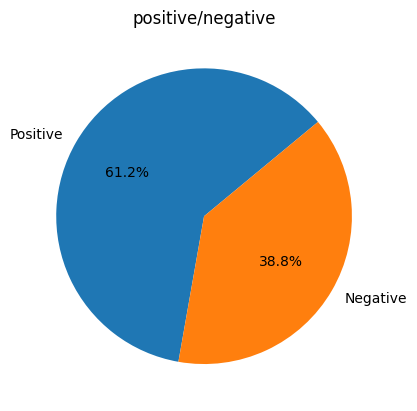

In [ ]:
import matplotlib.pyplot as plt

ratio = [32016, 20284]
labels = ['Positive', 'Negative']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('positive/negative')
plt.show()


In [ ]:
df = lyrics.isPositive.value_counts().reset_index()
df

isPositive  count
0           1  32016
1           0  20284

# 시간에 따른 변화

## 종합점수

### 연도별 종합점수 평균

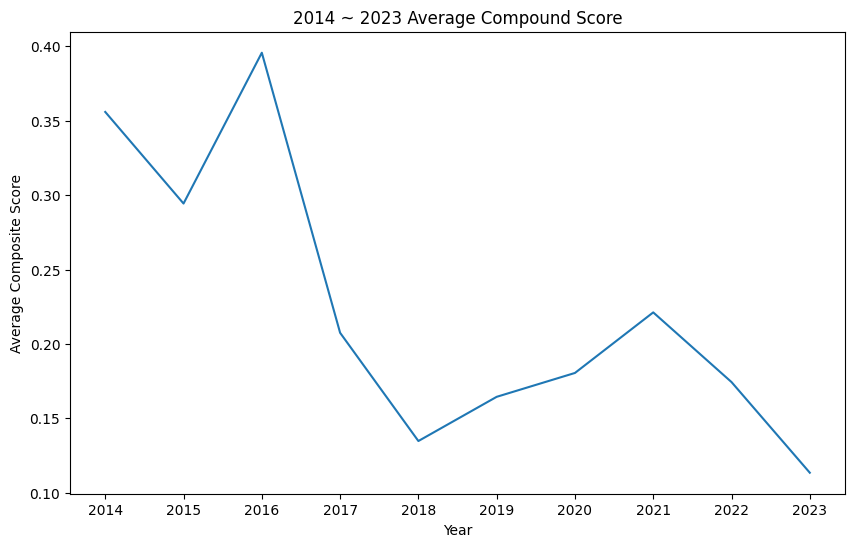

In [ ]:
df = lyrics.groupby(['Year']).compound.mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['compound'])

plt.xlabel('Year')
plt.ylabel('Average Composite Score')
plt.title('2014 ~ 2023 Average Compound Score')
plt.xticks(range(2014, 2024))
plt.show()

### 월별 종합점수 평균

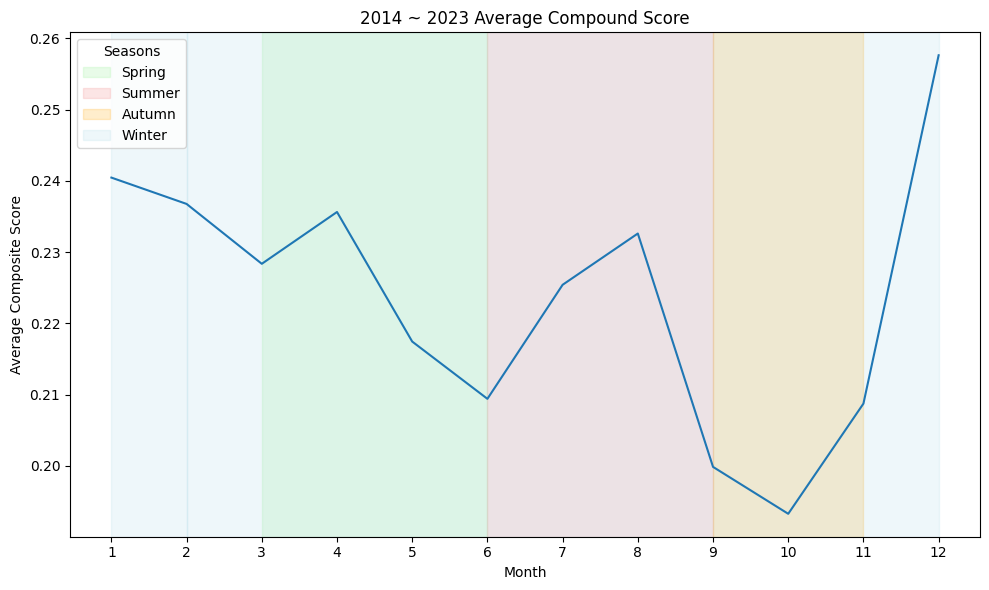

In [ ]:
df = lyrics.groupby(['Month']).compound.mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['compound'])
plt.axvspan(1, 2, alpha=0.2, color='lightblue')
plt.axvspan(3, 6, alpha=0.2, color='lightgreen', label='Spring')
plt.axvspan(6, 9, alpha=0.2, color='lightcoral', label='Summer')
plt.axvspan(9, 11, alpha=0.2, color='orange', label='Autumn')
plt.axvspan(12, 2, alpha=0.2, color='lightblue', label='Winter')
plt.xlabel('Month')
plt.ylabel('Average Composite Score')
plt.title('2014 ~ 2023 Average Compound Score')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.legend(title='Seasons')
plt.show()


### 연도별, 월별 종합점수 평균

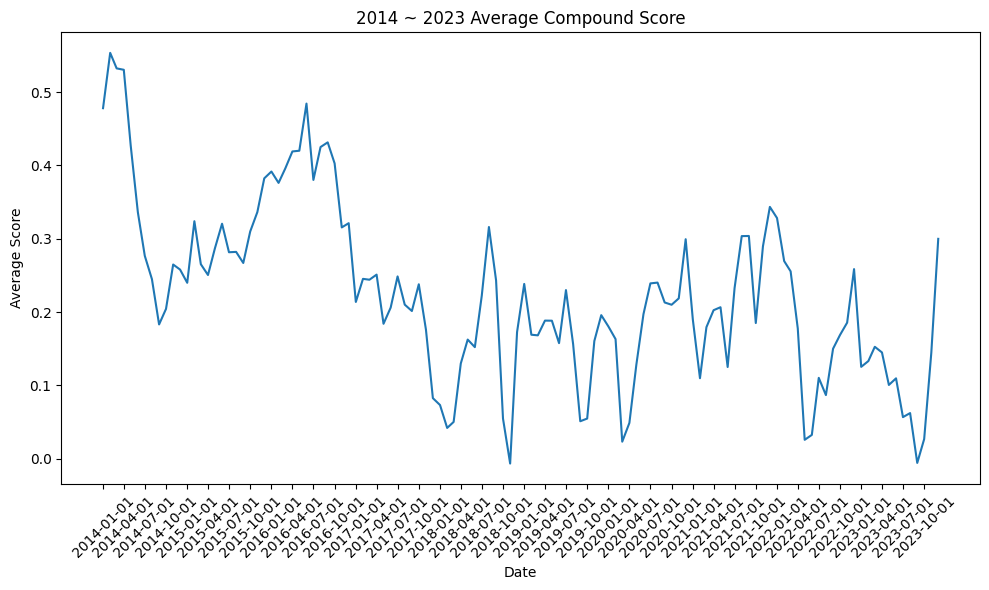

In [ ]:
df = lyrics.groupby(['Year', 'Month']).compound.mean().reset_index()
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['compound'])

plt.xticks(df['date'][::3], rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.title('2014 ~ 2023 Average Compound Score')
plt.tight_layout()
plt.show()

## 긍정, 부정, 중립 점수

### 연도별 점수

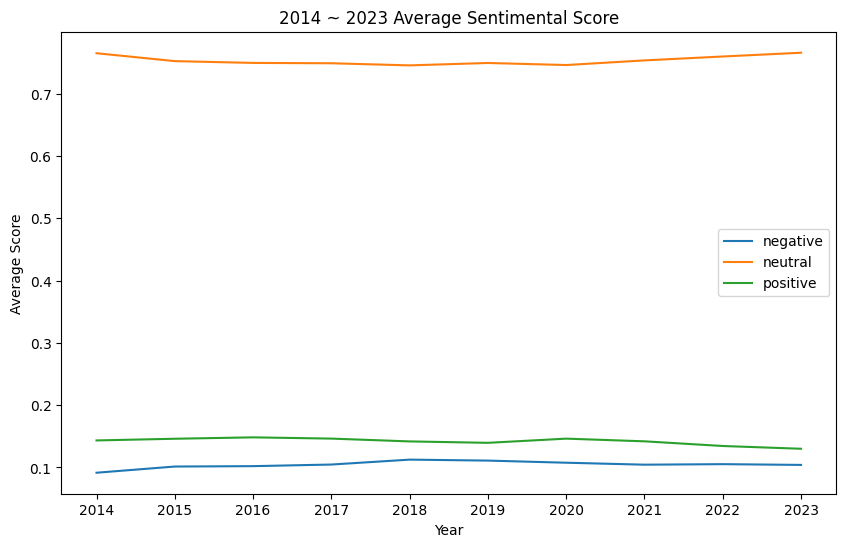

In [ ]:
df = lyrics.groupby(['Year'])[['neg', 'neu', 'pos']].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['neg'], label = 'negative')
plt.plot(df['Year'], df['neu'], label = 'neutral')
plt.plot(df['Year'], df['pos'], label = 'positive')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('2014 ~ 2023 Average Sentimental Score')
plt.xticks(range(2014, 2024))
plt.legend()
plt.show()

### 월별 점수 평균

In [ ]:
df = lyrics.groupby(['Month'])[['neg', 'neu', 'pos']].mean().reset_index()
df['neg'] = df.neg * -1
df

Month       neg       neu       pos
0       1 -0.102758  0.752906  0.144111
1       2 -0.104611  0.753703  0.141683
2       3 -0.105196  0.754091  0.140702
3       4 -0.104155  0.754985  0.140858
4       5 -0.104790  0.755379  0.139824
5       6 -0.103671  0.755612  0.140696
6       7 -0.103337  0.755834  0.140805
7       8 -0.103423  0.755852  0.140710
8       9 -0.105865  0.752683  0.141460
9      10 -0.107155  0.752253  0.140600
10     11 -0.107227  0.749676  0.143109
11     12 -0.101220  0.752513  0.146034

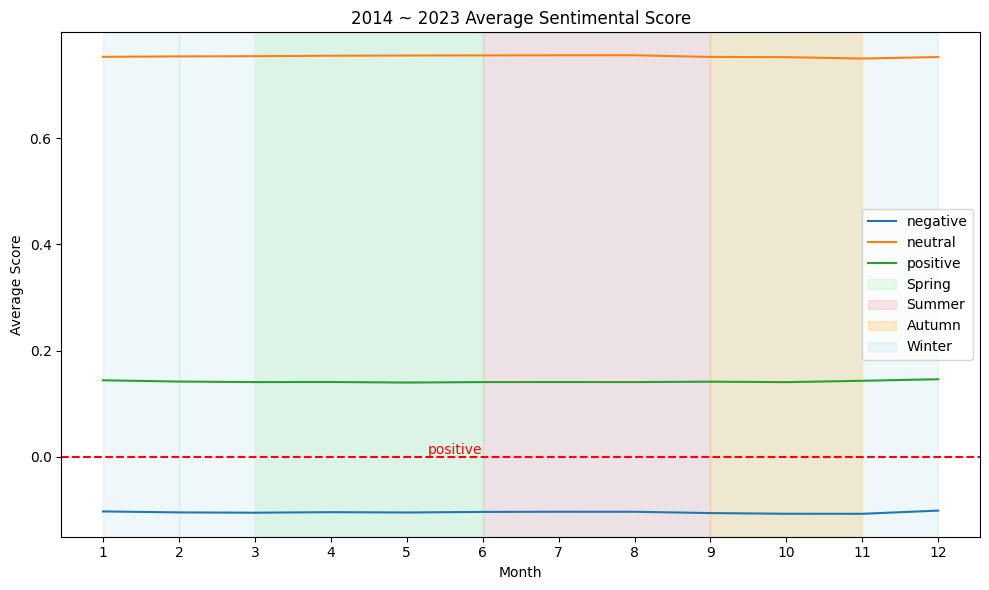

In [ ]:
df = lyrics.groupby(['Month'])[['neg', 'neu', 'pos']].mean().reset_index()
df['neg'] = df.neg * -1
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['neg'], label = 'negative')
plt.plot(df['Month'], df['neu'], label = 'neutral')
plt.plot(df['Month'], df['pos'], label = 'positive')
plt.axvspan(1, 2, alpha=0.2, color='lightblue')
plt.axvspan(3, 6, alpha=0.2, color='lightgreen', label='Spring')
plt.axvspan(6, 9, alpha=0.2, color='lightcoral', label='Summer')
plt.axvspan(9, 11, alpha=0.2, color='orange', label='Autumn')
plt.axvspan(12, 2, alpha=0.2, color='lightblue', label='Winter')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.title('2014 ~ 2023 Average Sentimental Score')

plt.axhline(0, color='red', linestyle='--')
plt.text(6, 0, f'positive', color='red', va='bottom', ha='right')

plt.xticks(range(1, 13))
plt.tight_layout()
plt.legend()
plt.show()


### 연도별, 월별 점수

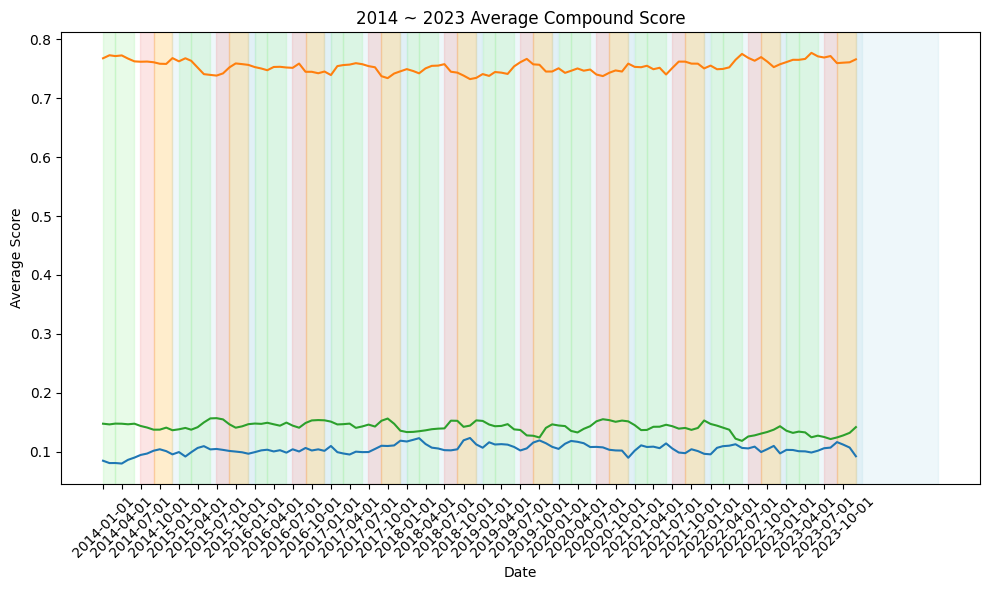

In [ ]:
df = lyrics.groupby(['Year', 'Month'])[['neg', 'neu', 'pos']].mean().reset_index()
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['neg'], label = 'negative')
plt.plot(df['date'], df['neu'], label = 'neutral')
plt.plot(df['date'], df['pos'], label = 'positive')

for year in range(2014, 2024):
    plt.axvspan(pd.to_datetime(f'{year}-01-01'), pd.to_datetime(f'{year}-02-28'), alpha=0.2, color='lightgreen', label='Winter')
    plt.axvspan(pd.to_datetime(f'{year}-03-01'), pd.to_datetime(f'{year}-06-01'), alpha=0.2, color='lightgreen', label='Spring')
    plt.axvspan(pd.to_datetime(f'{year}-06-30'), pd.to_datetime(f'{year}-09-01'), alpha=0.2, color='lightcoral', label='Summer')
    plt.axvspan(pd.to_datetime(f'{year}-09-01'), pd.to_datetime(f'{year}-11-30'), alpha=0.2, color='orange', label='Autumn')
    plt.axvspan(pd.to_datetime(f'{year}-12-01'), pd.to_datetime(f'{year+1}-12-31'), alpha=0.2, color='lightblue', label='Winter')

plt.xticks(df['date'][::3], rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.title('2014 ~ 2023 Average Compound Score')
plt.tight_layout()
plt.show()

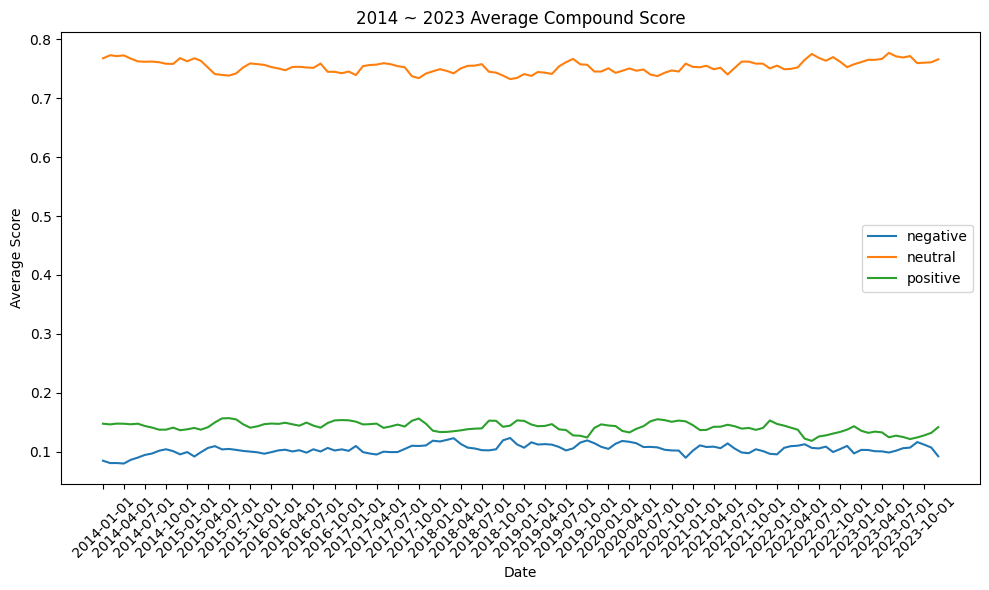

In [ ]:
df = lyrics.groupby(['Year', 'Month'])[['neg', 'neu', 'pos']].mean().reset_index()
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['neg'], label = 'negative')
plt.plot(df['date'], df['neu'], label = 'neutral')
plt.plot(df['date'], df['pos'], label = 'positive')

plt.xticks(df['date'][::3], rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.title('2014 ~ 2023 Average Compound Score')
plt.tight_layout()
plt.legend()
plt.show()

# 노래 순위 - 감성 점수

### 순위 그룹 생성

In [ ]:
lyrics['rank_group'] = 0
for i in tqdm(range(len(lyrics))):
  rank = lyrics.iloc[i].Rank
  if (rank >= 1) & (rank <= 20):
    group = 1
  elif (rank > 20) & (rank <= 40):
    group = 2
  elif (rank > 40) & (rank <= 60):
    group = 3
  elif (rank > 60) & (rank <= 80):
    group = 4
  else:
    group = 5
  lyrics.iloc[i, -1] = group
lyrics

100%|██████████| 52300/52300 [00:16<00:00, 3245.47it/s]


Year  Month  Week  Rank              Title  \
0      2014      1     2     1        The Monster   
1      2014      1     2     2             Timber   
2      2014      1     2     3     Counting Stars   
3      2014      1     2     4             Royals   
4      2014      1     2     5      Say Something   
...     ...    ...   ...   ...                ...   
52295  2023     12     5    96  Winter Wonderland   
52296  2023     12     5    97  Run For The Hills   
52297  2023     12     5    98           Que Onda   
52298  2023     12     5    99       Great Gatsby   
52299  2023     12     5   100   One Of The Girls   

                                       Artist  \
0                    Eminem Featuring Rihanna   
1                     Pitbull Featuring Ke$ha   
2                                 OneRepublic   
3                                       Lorde   
4      A Great Big World & Christina Aguilera   
...                                       ...   
52295                                   Chloe   
52296                              Tate McRae   
52297  Calle 24 x Chino Pacas x Fuerza Regida   
52298                                Rod Wave   
52299     The Weeknd, Jennie & Lily Rose Depp   

                                                  Lyrics    neg    neu    pos  \
0      I'm friends with the monster\nThat's under my ...  0.125  0.703  0.172   
1      It's going down, I'm yelling timber\nYou bette...  0.006  0.850  0.144   
2      Lately, I've been, I've been losing sleep\nDre...  0.144  0.779  0.077   
3      I've never seen a diamond in the flesh \nI cut...  0.059  0.809  0.131   
4      Say something, I'm giving up on you\nI'll be t...  0.017  0.780  0.203   
...                                                  ...    ...    ...    ...   
52295  [Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk...  0.055  0.862  0.083   
52296  Hotels, late nights, hands through my hair\nLo...  0.020  0.902  0.077   
52297  Baby, me vuelves loco\r\nNo se esperó al hotel...  0.046  0.938  0.016   
52298  (Pipe that shit up, TnT)\n(Trill got that juic...  0.191  0.743  0.066   
52299  Lock me up and throw away the key\r\nHe knows ...  0.201  0.771  0.028   

       compound  rank_group  
0        0.9904           1  
1        0.9958           1  
2       -0.9867           1  
3        0.9887           1  
4        0.9771           1  
...         ...         ...  
52295    0.8405           5  
52296    0.9676           5  
52297   -0.7319           5  
52298   -0.9849           5  
52299   -0.9946           5  

[52300 rows x 12 columns]

### Group 1: 1 ~ 20

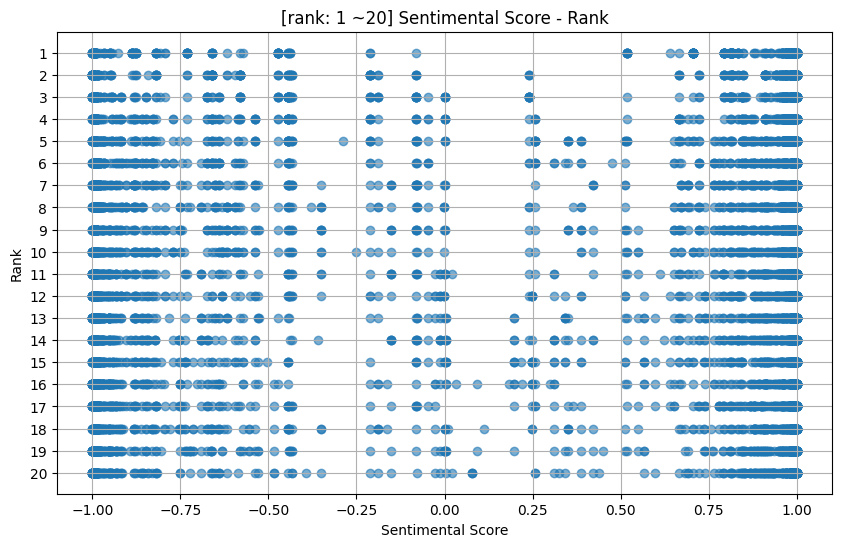

In [ ]:
plt.figure(figsize=(10, 6))
group_1 = lyrics[lyrics.rank_group == 1]
plt.scatter(group_1['compound'], group_1['Rank'], alpha=0.6)
plt.xlabel('Sentimental Score')
plt.ylabel('Rank')
plt.yticks(range(1, 21))
plt.title('[rank: 1 ~20] Sentimental Score - Rank')
plt.grid()
plt.gca().invert_yaxis()
plt.show()

### Group 2: 21 ~ 40

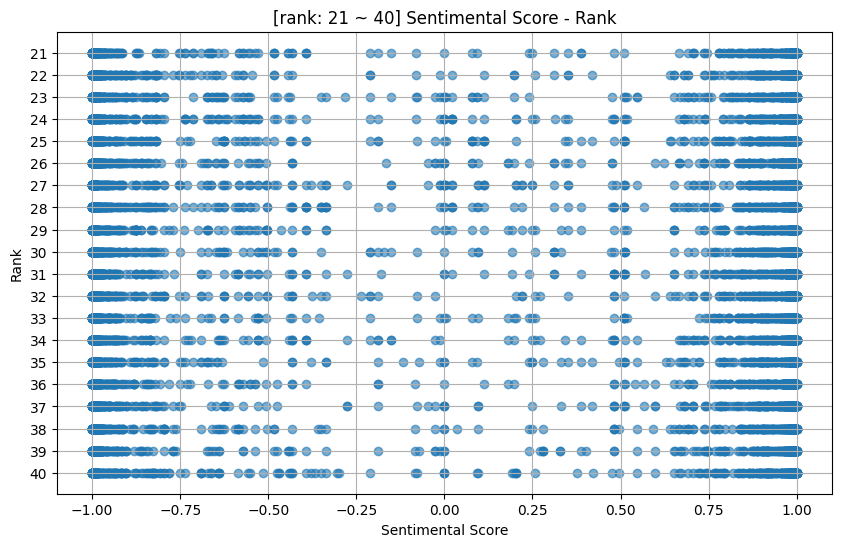

In [ ]:
plt.figure(figsize=(10, 6))
group_1 = lyrics[lyrics.rank_group == 2]
plt.scatter(group_1['compound'], group_1['Rank'], alpha=0.6)
plt.xlabel('Sentimental Score')
plt.ylabel('Rank')
plt.yticks(range(21, 41))
plt.title('[rank: 21 ~ 40] Sentimental Score - Rank')
plt.grid()
plt.gca().invert_yaxis()
plt.show()

### Group 3: 41~60

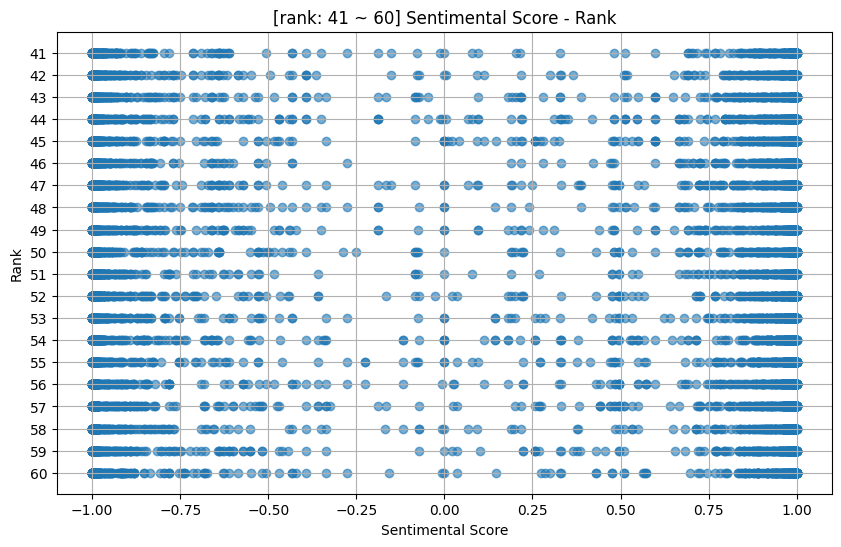

In [ ]:
plt.figure(figsize=(10, 6))
group_1 = lyrics[lyrics.rank_group == 3]
plt.scatter(group_1['compound'], group_1['Rank'], alpha=0.6)
plt.xlabel('Sentimental Score')
plt.ylabel('Rank')
plt.yticks(range(41, 61))
plt.title('[rank: 41 ~ 60] Sentimental Score - Rank')
plt.grid()
plt.gca().invert_yaxis()
plt.show()

### Group 4: 61 ~ 80

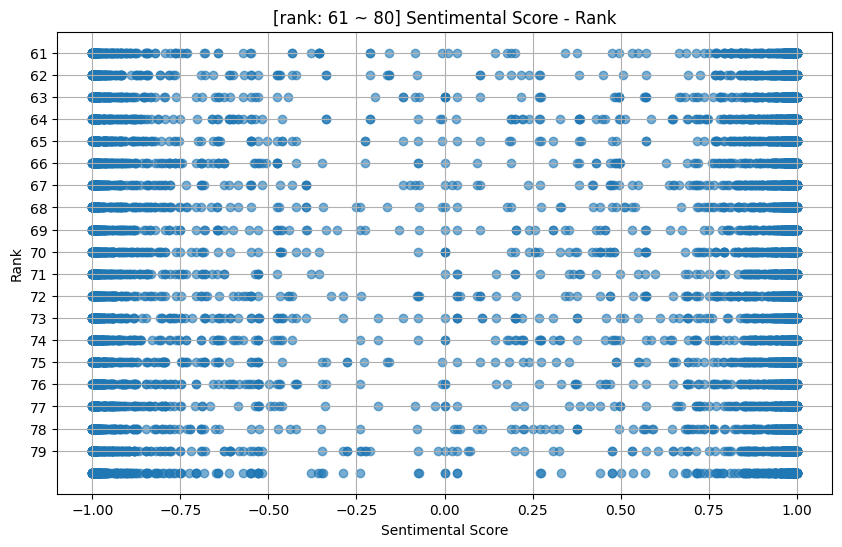

In [ ]:
plt.figure(figsize=(10, 6))
group_1 = lyrics[lyrics.rank_group == 4]
plt.scatter(group_1['compound'], group_1['Rank'], alpha=0.6)
plt.xlabel('Sentimental Score')
plt.ylabel('Rank')
plt.yticks(range(61, 80))
plt.title('[rank: 61 ~ 80] Sentimental Score - Rank')
plt.grid()
plt.gca().invert_yaxis()
plt.show()

### Group 5: 81 ~ 100

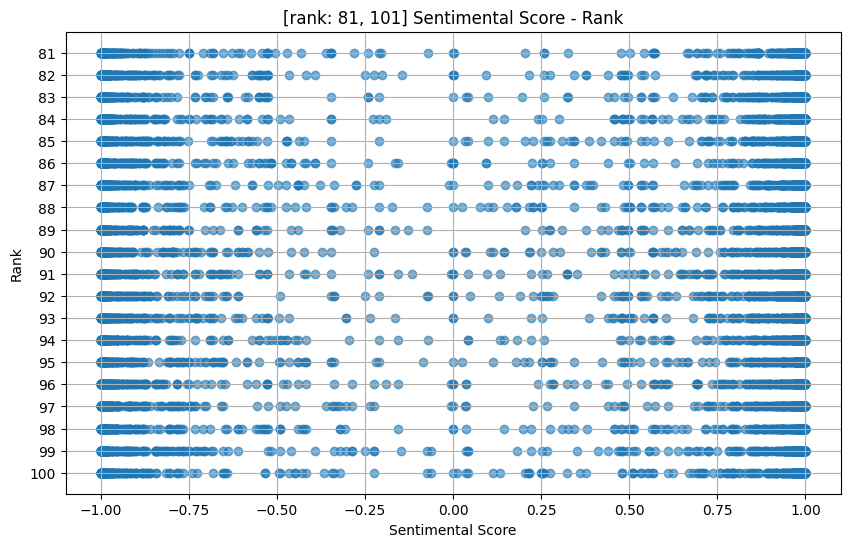

In [ ]:
plt.figure(figsize=(10, 6))
group_1 = lyrics[lyrics.rank_group == 5]
plt.scatter(group_1['compound'], group_1['Rank'], alpha=0.6)
plt.xlabel('Sentimental Score')
plt.ylabel('Rank')
plt.yticks(range(81, 101))
plt.title('[rank: 81, 101] Sentimental Score - Rank')
plt.grid()
plt.gca().invert_yaxis()
plt.show()

### 전체

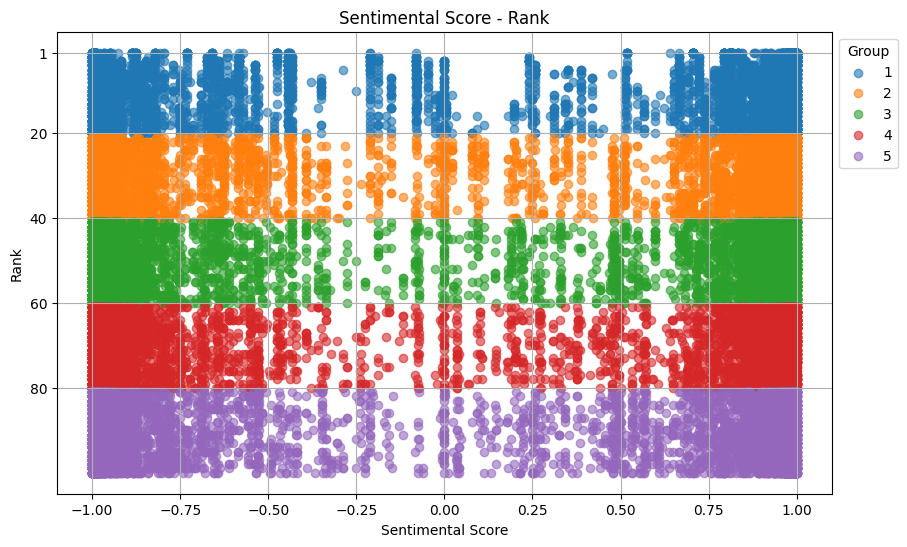

In [ ]:
groups = lyrics['rank_group'].unique()

plt.figure(figsize=(10, 6))

for group in groups:
    group_df = lyrics[lyrics['rank_group'] == group]
    plt.scatter(group_df['compound'], group_df['Rank'], label=group, alpha=0.6)

plt.xlabel('Sentimental Score')
plt.ylabel('Rank')
plt.title('Sentimental Score - Rank')
plt.grid()
plt.yticks([1, 20, 40, 60, 80])
plt.gca().invert_yaxis()
plt.legend(title='Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 그룹 평균

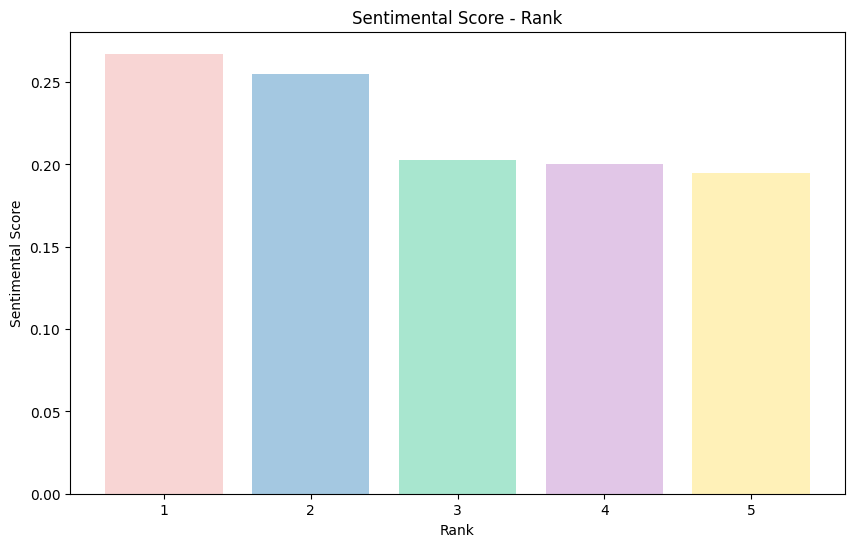

In [ ]:
df= lyrics.groupby('rank_group').compound.mean().reset_index()
plt.figure(figsize=(10, 6))
pastel_colors = ['#F8D5D4', '#A4C8E1', '#A8E6CF', '#E1C6E7', '#FFF1B8']
plt.bar(df['rank_group'], df['compound'], color=pastel_colors)

plt.xlabel('Rank')
plt.ylabel('Sentimental Score')
plt.title('Sentimental Score - Rank')

plt.show()

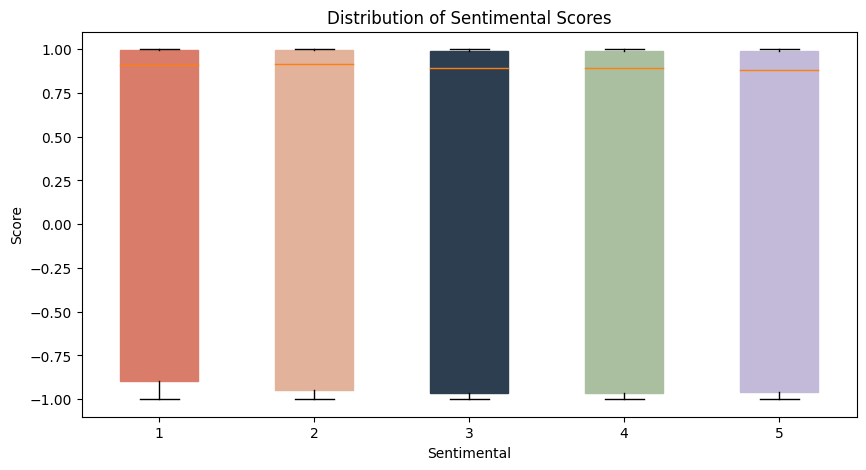

In [ ]:
idx = np.arange(1, 4)
labels = ['1~20', '21~40', '41~60', '61~80', '81~100']
group_1 = lyrics[lyrics.rank_group == 1].compound
group_2 = lyrics[lyrics.rank_group == 2].compound
group_3 = lyrics[lyrics.rank_group == 3].compound
group_4 = lyrics[lyrics.rank_group == 4].compound
group_5 = lyrics[lyrics.rank_group == 5].compound

plt.figure(figsize = (10, 5))
box_plots = plt.boxplot([group_1, group_2, group_3, group_4, group_5], patch_artist = True)

colors = ['#D97C6A', '#E3B29B', '#2C3E50', '#A9BFA0', '#C3B9D9']
for patch, color in zip(box_plots['boxes'], colors):
    patch.set_color(color)

plt.xlabel('Sentimental')
plt.ylabel('Score')
plt.title('Distribution of Sentimental Scores')
plt.show()

## 극단적인 정도

In [ ]:
df = lyrics
df['compound'] = abs(df.compound)
df

Year  Month  Week  Rank              Title  \
0      2014      1     2     1        The Monster   
1      2014      1     2     2             Timber   
2      2014      1     2     3     Counting Stars   
3      2014      1     2     4             Royals   
4      2014      1     2     5      Say Something   
...     ...    ...   ...   ...                ...   
52295  2023     12     5    96  Winter Wonderland   
52296  2023     12     5    97  Run For The Hills   
52297  2023     12     5    98           Que Onda   
52298  2023     12     5    99       Great Gatsby   
52299  2023     12     5   100   One Of The Girls   

                                       Artist  \
0                    Eminem Featuring Rihanna   
1                     Pitbull Featuring Ke$ha   
2                                 OneRepublic   
3                                       Lorde   
4      A Great Big World & Christina Aguilera   
...                                       ...   
52295                                   Chloe   
52296                              Tate McRae   
52297  Calle 24 x Chino Pacas x Fuerza Regida   
52298                                Rod Wave   
52299     The Weeknd, Jennie & Lily Rose Depp   

                                                  Lyrics    neg    neu    pos  \
0      I'm friends with the monster\nThat's under my ...  0.125  0.703  0.172   
1      It's going down, I'm yelling timber\nYou bette...  0.006  0.850  0.144   
2      Lately, I've been, I've been losing sleep\nDre...  0.144  0.779  0.077   
3      I've never seen a diamond in the flesh \nI cut...  0.059  0.809  0.131   
4      Say something, I'm giving up on you\nI'll be t...  0.017  0.780  0.203   
...                                                  ...    ...    ...    ...   
52295  [Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk...  0.055  0.862  0.083   
52296  Hotels, late nights, hands through my hair\nLo...  0.020  0.902  0.077   
52297  Baby, me vuelves loco\r\nNo se esperó al hotel...  0.046  0.938  0.016   
52298  (Pipe that shit up, TnT)\n(Trill got that juic...  0.191  0.743  0.066   
52299  Lock me up and throw away the key\r\nHe knows ...  0.201  0.771  0.028   

       compound  rank_group  length  
0        0.9904           1    3466  
1        0.9958           1    2436  
2        0.9867           1    2753  
3        0.9887           1    2045  
4        0.9771           1     715  
...         ...         ...     ...  
52295    0.8405           5    1196  
52296    0.9676           5    2137  
52297    0.7319           5    1257  
52298    0.9849           5    1216  
52299    0.9946           5    1761  

[52300 rows x 13 columns]

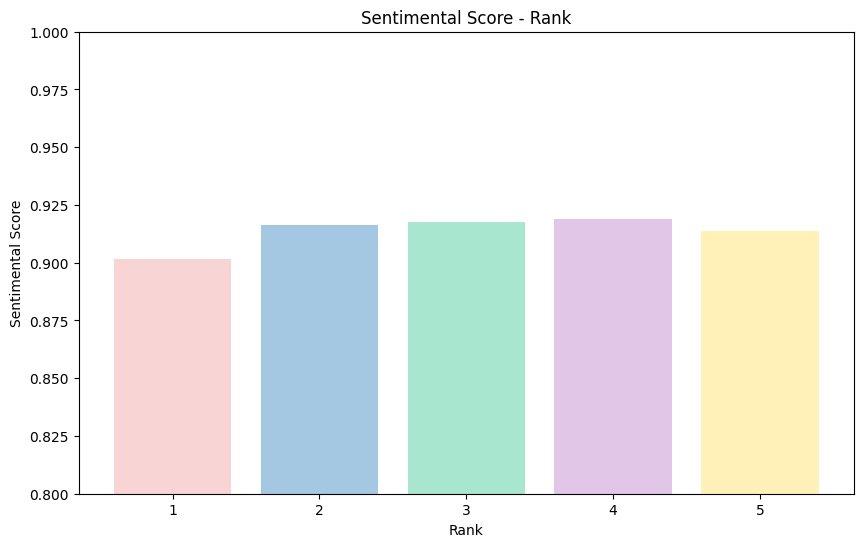

In [ ]:
df= df.groupby('rank_group').compound.mean().reset_index()
plt.figure(figsize=(10, 6))
pastel_colors = ['#F8D5D4', '#A4C8E1', '#A8E6CF', '#E1C6E7', '#FFF1B8']
plt.bar(df['rank_group'], df['compound'], color=pastel_colors)

plt.xlabel('Rank')
plt.ylabel('Sentimental Score')
plt.title('Sentimental Score - Rank')
plt.ylim(0.8, 1)
plt.yticks([0.8, 0.825, 0.85, 0.875, 0.90, 0.925,  0.95, 0.975, 1.00])
plt.show()

# 가사 길이 - 감성 점수

### 가사 길이 feature 추가

In [ ]:
# 공백 줄 제거
lyrics['Lyrics'] = lyrics['Lyrics'].str.replace(r'\n\s*\n', '\n', regex=True)

In [ ]:
lyrics['length'] = 0
for i in tqdm(range(len(lyrics))):
  l = lyrics.iloc[i].Lyrics
  lyrics.iloc[i, -1] = len(l)
lyrics

100%|██████████| 52300/52300 [00:16<00:00, 3141.01it/s]


Year  Month  Week  Rank              Title  \
0      2014      1     2     1        The Monster   
1      2014      1     2     2             Timber   
2      2014      1     2     3     Counting Stars   
3      2014      1     2     4             Royals   
4      2014      1     2     5      Say Something   
...     ...    ...   ...   ...                ...   
52295  2023     12     5    96  Winter Wonderland   
52296  2023     12     5    97  Run For The Hills   
52297  2023     12     5    98           Que Onda   
52298  2023     12     5    99       Great Gatsby   
52299  2023     12     5   100   One Of The Girls   

                                       Artist  \
0                    Eminem Featuring Rihanna   
1                     Pitbull Featuring Ke$ha   
2                                 OneRepublic   
3                                       Lorde   
4      A Great Big World & Christina Aguilera   
...                                       ...   
52295                                   Chloe   
52296                              Tate McRae   
52297  Calle 24 x Chino Pacas x Fuerza Regida   
52298                                Rod Wave   
52299     The Weeknd, Jennie & Lily Rose Depp   

                                                  Lyrics    neg    neu    pos  \
0      I'm friends with the monster\nThat's under my ...  0.125  0.703  0.172   
1      It's going down, I'm yelling timber\nYou bette...  0.006  0.850  0.144   
2      Lately, I've been, I've been losing sleep\nDre...  0.144  0.779  0.077   
3      I've never seen a diamond in the flesh \nI cut...  0.059  0.809  0.131   
4      Say something, I'm giving up on you\nI'll be t...  0.017  0.780  0.203   
...                                                  ...    ...    ...    ...   
52295  [Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk...  0.055  0.862  0.083   
52296  Hotels, late nights, hands through my hair\nLo...  0.020  0.902  0.077   
52297  Baby, me vuelves loco\r\nNo se esperó al hotel...  0.046  0.938  0.016   
52298  (Pipe that shit up, TnT)\n(Trill got that juic...  0.191  0.743  0.066   
52299  Lock me up and throw away the key\r\nHe knows ...  0.201  0.771  0.028   

       compound  rank_group  length  
0        0.9904           1    3466  
1        0.9958           1    2436  
2       -0.9867           1    2753  
3        0.9887           1    2045  
4        0.9771           1     715  
...         ...         ...     ...  
52295    0.8405           5    1196  
52296    0.9676           5    2137  
52297   -0.7319           5    1257  
52298   -0.9849           5    1216  
52299   -0.9946           5    1761  

[52300 rows x 13 columns]

### 가사 길이 분포

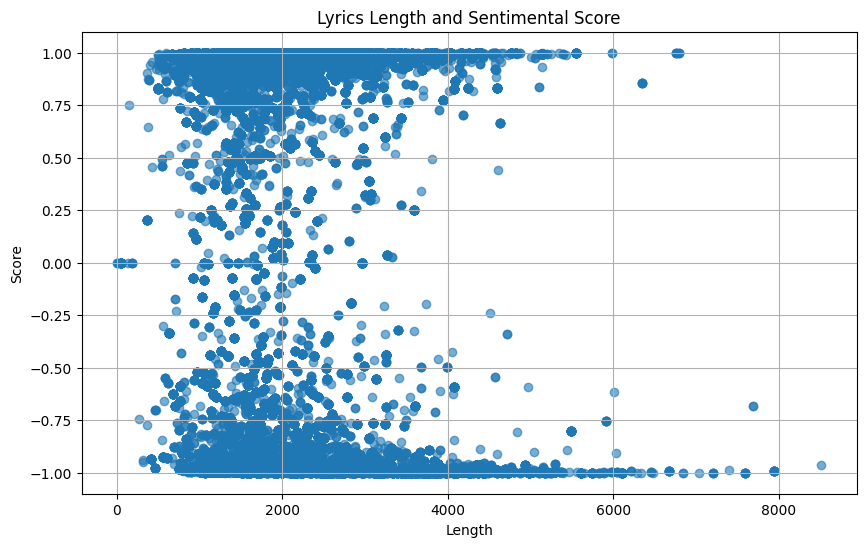

In [ ]:
x = lyrics['length']
y = lyrics['compound']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6)

plt.xlabel('Length')
plt.ylabel('Score')
plt.title('Lyrics Length and Sentimental Score')
plt.grid()
plt.show()

### 감정별 가사 길이

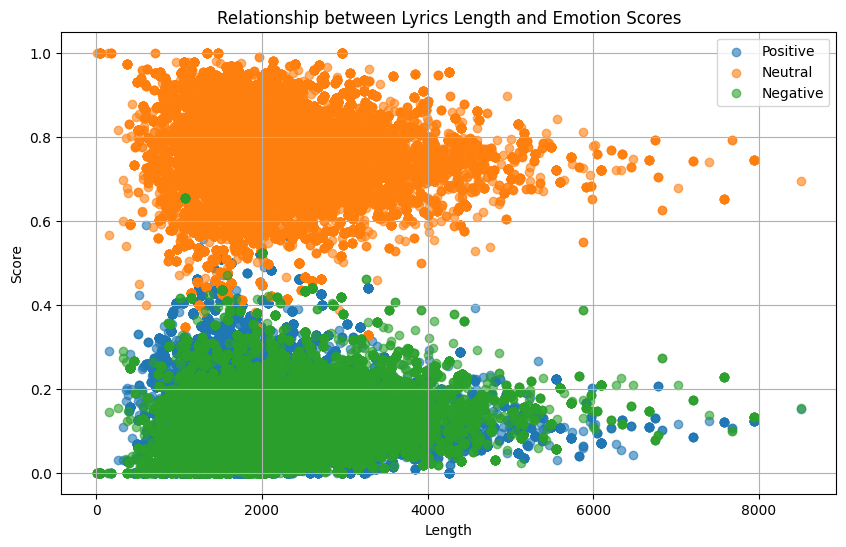

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(lyrics['length'], lyrics['pos'], label='Positive', alpha=0.6)
plt.scatter(lyrics['length'], lyrics['neu'], label='Neutral', alpha=0.6)
plt.scatter(lyrics['length'], lyrics['neg'], label='Negative', alpha=0.6)

plt.xlabel('Length')
plt.ylabel('Score')
plt.title('Relationship between Lyrics Length and Emotion Scores')
plt.legend()
plt.grid()
plt.show()

### 순위 그룹별 가사 길이

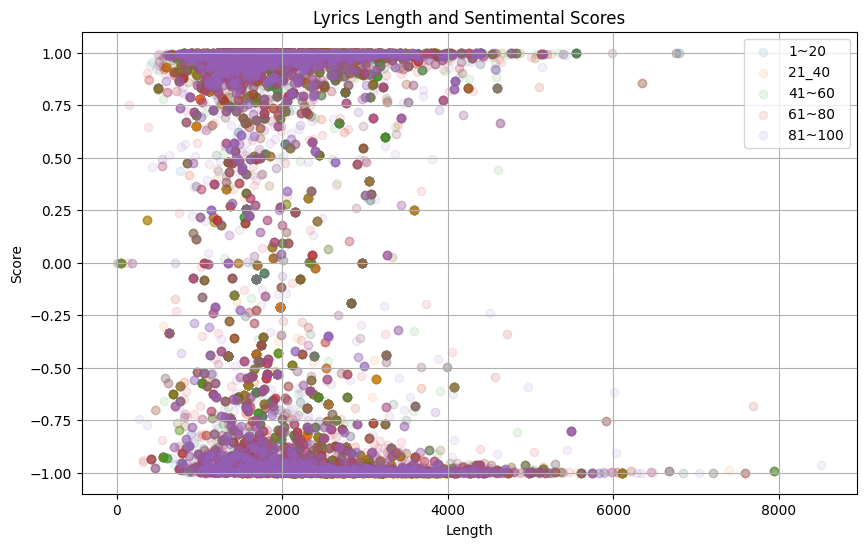

In [ ]:
plt.figure(figsize=(10, 6))
group_1 = lyrics[lyrics.rank_group == 1]
group_2 = lyrics[lyrics.rank_group == 2]
group_3 = lyrics[lyrics.rank_group == 3]
group_4 = lyrics[lyrics.rank_group == 4]
group_5 = lyrics[lyrics.rank_group == 5]
plt.scatter(group_1['length'], group_1['compound'], label='1~20', alpha=0.1)
plt.scatter(group_2['length'], group_2['compound'], label='21_40', alpha=0.1)
plt.scatter(group_3['length'], group_3['compound'], label='41~60', alpha=0.1)
plt.scatter(group_4['length'], group_4['compound'], label='61~80', alpha=0.1)
plt.scatter(group_5['length'], group_5['compound'], label='81~100', alpha=0.1)

plt.xlabel('Length')
plt.ylabel('Score')
plt.title('Lyrics Length and Sentimental Scores')
plt.legend()
plt.grid()
plt.show()

# 전체 데이터

In [ ]:
data['neg'] = 0
data['neu'] = 0
data['pos'] = 0
data['compound'] = 0

sia = SentimentIntensityAnalyzer()

for i in tqdm(range(len(data))):
  lyric = data.iloc[i].Lyrics
  scores = sia.polarity_scores(lyric)

  data.iloc[i, 17] = scores['neg']
  data.iloc[i, 18] = scores['neu']
  data.iloc[i, 19] = scores['pos']
  data.iloc[i, 20] = scores['compound']

  0%|          | 0/52100 [00:00<?, ?it/s]<ipython-input-52-76f74ebd6f76>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i, 17] = scores['neg']
<ipython-input-52-76f74ebd6f76>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.703' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i, 18] = scores['neu']
<ipython-input-52-76f74ebd6f76>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.172' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i, 19] = scores['pos']
<ipython-input-52-76f74ebd6f76>:15: FutureWarning: Setting an item of incompa

In [ ]:
data = pd.read_csv('final_data_senti.csv').drop(columns = 'Unnamed: 0')
data

Year  Month  Week  Rank              Title  \
0      2014      1     2     1        The Monster   
1      2014      1     2     2             Timber   
2      2014      1     2     3     Counting Stars   
3      2014      1     2     4             Royals   
4      2014      1     2     5      Say Something   
...     ...    ...   ...   ...                ...   
52095  2023     12     5    96  Winter Wonderland   
52096  2023     12     5    97  Run For The Hills   
52097  2023     12     5    98           Que Onda   
52098  2023     12     5    99       Great Gatsby   
52099  2023     12     5   100   One Of The Girls   

                                       Artist  \
0                    Eminem Featuring Rihanna   
1                     Pitbull Featuring Ke$ha   
2                                 OneRepublic   
3                                       Lorde   
4      A Great Big World & Christina Aguilera   
...                                       ...   
52095                                   Chloe   
52096                              Tate McRae   
52097  Calle 24 x Chino Pacas x Fuerza Regida   
52098                                Rod Wave   
52099     The Weeknd, Jennie & Lily Rose Depp   

                                                  Lyrics               Genre  \
0      I'm friends with the monster\nThat's under my ...                랩/힙합   
1      It's going down, I'm yelling timber\nYou bette...                 POP   
2      Lately, I've been, I've been losing sleep\nDre...                랩/힙합   
3      I've never seen a diamond in the flesh \nI cut...           POP, 록/메탈   
4      Say something, I'm giving up on you\nI'll be t...                 발라드   
...                                                  ...                 ...   
52095  [Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk...  재즈, 보컬재즈, 애시드/퓨전/팝   
52096  Hotels, late nights, hands through my hair\nLo...                 POP   
52097  Baby, me vuelves loco\r\nNo se esperó al hotel...            월드뮤직, 라틴   
52098  (Pipe that shit up, TnT)\n(Trill got that juic...                 POP   
52099  Lock me up and throw away the key\r\nHe knows ...     R&B/Soul, 국외드라마   

           BPM  Duration_sec  ...                    color2  \
0      110.009       251.246  ...         Cyan Muted Medium   
1      129.992       204.160  ...        Blue Medium Medium   
2      122.013       257.840  ...        Orange Medium Dark   
3       84.876       190.185  ...       Red Muted Very Dark   
4      141.284       229.400  ...     Yellow Vibrant Medium   
...        ...           ...  ...                       ...   
52095   77.810      1037.907  ...           Blue Muted Dark   
52096  129.918       143.940  ...  Purple Vibrant Very Dark   
52097  125.012       189.426  ...         Blue Medium Light   
52098  156.975       146.752  ...         Red Medium Medium   
52099   84.828       244.685  ...        Red Vibrant Medium   

                        color3             rgb1             rgb2  \
0           Cyan Vibrant Light   (186, 97, 156)    (39, 83, 108)   
1          Blue Vibrant Medium     (18, 22, 36)    (60, 98, 156)   
2      Orange Medium Very Dark     (82, 68, 48)  (201, 171, 129)   
3             Red Vibrant Dark  (151, 123, 112)     (47, 39, 32)   
4             Cyan Medium Dark     (33, 39, 67)  (241, 244, 229)   
...                        ...              ...              ...   
52095     Red Medium Very Dark  (200, 215, 236)     (55, 67, 84)   
52096          Red Medium Dark     (31, 30, 30)  (191, 187, 195)   
52097         Blue Medium Dark  (161, 163, 191)    (30, 57, 153)   
52098  Yellow Medium Very Dark     (54, 32, 13)   (176, 111, 58)   
52099        Cyan Vibrant Dark     (71, 83, 80)  (222, 157, 149)   

                  rgb3 Featuring    neg    neu    pos  compound  
0      (138, 208, 228)       1.0  0.125  0.703  0.172    0.9904  
1      (184, 204, 226)       1.0  0.006  0.850  0.144    0.9958  
2      (161, 153, 132)       0.0  0.144  0.779  

## genre - sentimental

In [ ]:
df = data

In [ ]:
df = df.drop_duplicates(subset = ['Title', 'Artist'])

In [ ]:
df['Genre_1'] = ''

<ipython-input-15-8b33c6484aa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre_1'] = ''


In [ ]:
df.columns

Index(['Year', 'Month', 'Week', 'Rank', 'Title', 'Artist', 'Lyrics', 'Genre',
       'BPM', 'Duration_sec', 'color1', 'color2', 'color3', 'rgb1', 'rgb2',
       'rgb3', 'Featuring', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [ ]:
for i in range(len(df)):
  df.iloc[i, 21] = df.iloc[i].Genre.split(',')[0]

In [ ]:
df_1 = df.groupby('Genre_1').compound.mean().reset_index()
df_1['abs'] = abs(df_1.compound)
df_1 = df_1.sort_values(by = 'abs', ascending = False)
df_1.head(20)

Genre_1  compound       abs
5   R&B/Soul 국외영화  0.993500  0.993500
10             국악  0.992700  0.992700
8           국내뮤지컬 -0.990600  0.990600
31         포크/블루스  0.972025  0.972025
18          뮤직테라피  0.966400  0.966400
6              게임  0.842667  0.842667
23           월드뮤직 -0.507491  0.507491
12          국외뮤지컬  0.487750  0.487750
9            국내영화 -0.475100  0.475100
27            컨트리  0.430350  0.430350
0             CCM  0.406879  0.406879
3             R&B  0.365000  0.365000
26             재즈  0.325369  0.325369
22       애니메이션/웹툰  0.319921  0.319921
7           국내드라마  0.315767  0.315767
19            발라드  0.313607  0.313607
4        R&B/Soul  0.298623  0.298623
30             포크  0.288145  0.288145
2             POP  0.284978  0.284978
29             키즈  0.241192  0.241192

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (15.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123622 files and direc

In [ ]:
from matplotlib import font_manager
font_manager.findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/L

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
data

Year  Month  Week  Rank              Title  \
0      2014      1     2     1        The Monster   
1      2014      1     2     2             Timber   
2      2014      1     2     3     Counting Stars   
3      2014      1     2     4             Royals   
4      2014      1     2     5      Say Something   
...     ...    ...   ...   ...                ...   
52095  2023     12     5    96  Winter Wonderland   
52096  2023     12     5    97  Run For The Hills   
52097  2023     12     5    98           Que Onda   
52098  2023     12     5    99       Great Gatsby   
52099  2023     12     5   100   One Of The Girls   

                                       Artist  \
0                    Eminem Featuring Rihanna   
1                     Pitbull Featuring Ke$ha   
2                                 OneRepublic   
3                                       Lorde   
4      A Great Big World & Christina Aguilera   
...                                       ...   
52095                                   Chloe   
52096                              Tate McRae   
52097  Calle 24 x Chino Pacas x Fuerza Regida   
52098                                Rod Wave   
52099     The Weeknd, Jennie & Lily Rose Depp   

                                                  Lyrics               Genre  \
0      I'm friends with the monster\nThat's under my ...                랩/힙합   
1      It's going down, I'm yelling timber\nYou bette...                 POP   
2      Lately, I've been, I've been losing sleep\nDre...                랩/힙합   
3      I've never seen a diamond in the flesh \nI cut...           POP, 록/메탈   
4      Say something, I'm giving up on you\nI'll be t...                 발라드   
...                                                  ...                 ...   
52095  [Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk...  재즈, 보컬재즈, 애시드/퓨전/팝   
52096  Hotels, late nights, hands through my hair\nLo...                 POP   
52097  Baby, me vuelves loco\r\nNo se esperó al hotel...            월드뮤직, 라틴   
52098  (Pipe that shit up, TnT)\n(Trill got that juic...                 POP   
52099  Lock me up and throw away the key\r\nHe knows ...     R&B/Soul, 국외드라마   

           BPM  Duration_sec  ...                    color2  \
0      110.009       251.246  ...         Cyan Muted Medium   
1      129.992       204.160  ...        Blue Medium Medium   
2      122.013       257.840  ...        Orange Medium Dark   
3       84.876       190.185  ...       Red Muted Very Dark   
4      141.284       229.400  ...     Yellow Vibrant Medium   
...        ...           ...  ...                       ...   
52095   77.810      1037.907  ...           Blue Muted Dark   
52096  129.918       143.940  ...  Purple Vibrant Very Dark   
52097  125.012       189.426  ...         Blue Medium Light   
52098  156.975       146.752  ...         Red Medium Medium   
52099   84.828       244.685  ...        Red Vibrant Medium   

                        color3             rgb1             rgb2  \
0           Cyan Vibrant Light   (186, 97, 156)    (39, 83, 108)   
1          Blue Vibrant Medium     (18, 22, 36)    (60, 98, 156)   
2      Orange Medium Very Dark     (82, 68, 48)  (201, 171, 129)   
3             Red Vibrant Dark  (151, 123, 112)     (47, 39, 32)   
4             Cyan Medium Dark     (33, 39, 67)  (241, 244, 229)   
...                        ...              ...              ...   
52095     Red Medium Very Dark  (200, 215, 236)     (55, 67, 84)   
52096          Red Medium Dark     (31, 30, 30)  (191, 187, 195)   
52097         Blue Medium Dark  (161, 163, 191)    (30, 57, 153)   
52098  Yellow Medium Very Dark     (54, 32, 13)   (176, 111, 58)   
52099        Cyan Vibrant Dark     (71, 83, 80)  (222, 157, 149)   

                  rgb3 Featuring    neg    neu    pos  compound  
0      (138, 208, 228)       1.0  0.125  0.703  0.172    0.9904  
1      (184, 204, 226)       1.0  0.006  0.850  0.144    0.9958  
2      (161, 153, 132)       0.0  0.144  0.779  

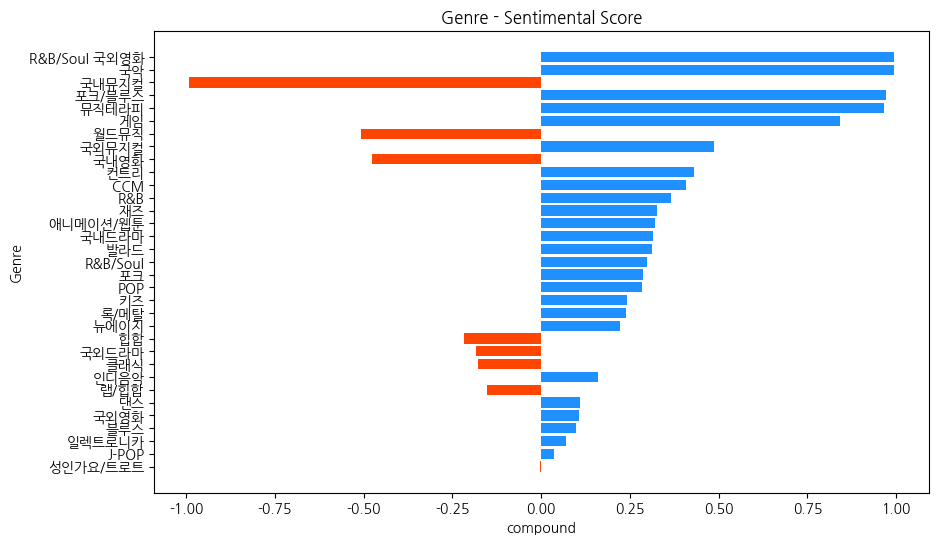

In [ ]:
plt.figure(figsize=(10, 6))
y = np.arange(20)
clrs = ['#1E90FF' if x > 0 else '#FF4500' for x in df_1.compound]
plt.barh(df_1.Genre_1, df_1.compound, color = clrs)

plt.xlabel('compound')
plt.ylabel('Genre')
plt.title('Genre - Sentimental Score')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df_1.set_index('Genre_1')

compound       abs
Genre_1                          
R&B/Soul 국외영화  0.993500  0.993500
국악             0.992700  0.992700
국내뮤지컬         -0.990600  0.990600
포크/블루스         0.972025  0.972025
뮤직테라피          0.966400  0.966400
게임             0.842667  0.842667
월드뮤직          -0.507491  0.507491
국외뮤지컬          0.487750  0.487750
국내영화          -0.475100  0.475100
컨트리            0.430350  0.430350
CCM            0.406879  0.406879
R&B            0.365000  0.365000
재즈             0.325369  0.325369
애니메이션/웹툰       0.319921  0.319921
국내드라마          0.315767  0.315767
발라드            0.313607  0.313607
R&B/Soul       0.298623  0.298623
포크             0.288145  0.288145
POP            0.284978  0.284978
키즈             0.241192  0.241192
록/메탈           0.239061  0.239061
뉴에이지           0.221603  0.221603
힙합            -0.216618  0.216618
국외드라마         -0.182185  0.182185
클래식           -0.179190  0.179190
인디음악           0.158772  0.158772
랩/힙합          -0.152145  0.152145
댄스             0.109294  0.109294
국외영화           0.105966  0.105966
블루스            0.096885  0.096885
일렉트로니카         0.069472  0.069472
J-POP          0.036704  0.036704
성인가요/트로트      -0.003150  0.003150

In [ ]:
top20_genre = df.value_counts('Genre_1').reset_index().head(20).Genre_1
top20_genre

0         랩/힙합
1          POP
2     R&B/Soul
3          컨트리
4         록/메탈
5           댄스
6       일렉트로니카
7         월드뮤직
8          발라드
9        J-POP
10          재즈
11        국외영화
12          힙합
13        뉴에이지
14         클래식
15        인디음악
16         CCM
17    애니메이션/웹툰
18          포크
19       국외드라마
Name: Genre_1, dtype: object

In [ ]:
df_genre = pd.merge(top20_genre, df_1, how = 'left', on = 'Genre_1')
df_genre

Genre_1  compound       abs
0       랩/힙합 -0.152145  0.152145
1        POP  0.284978  0.284978
2   R&B/Soul  0.298623  0.298623
3        컨트리  0.430350  0.430350
4       록/메탈  0.239061  0.239061
5         댄스  0.109294  0.109294
6     일렉트로니카  0.069472  0.069472
7       월드뮤직 -0.507491  0.507491
8        발라드  0.313607  0.313607
9      J-POP  0.036704  0.036704
10        재즈  0.325369  0.325369
11      국외영화  0.105966  0.105966
12        힙합 -0.216618  0.216618
13      뉴에이지  0.221603  0.221603
14       클래식 -0.179190  0.179190
15      인디음악  0.158772  0.158772
16       CCM  0.406879  0.406879
17  애니메이션/웹툰  0.319921  0.319921
18        포크  0.288145  0.288145
19     국외드라마 -0.182185  0.182185

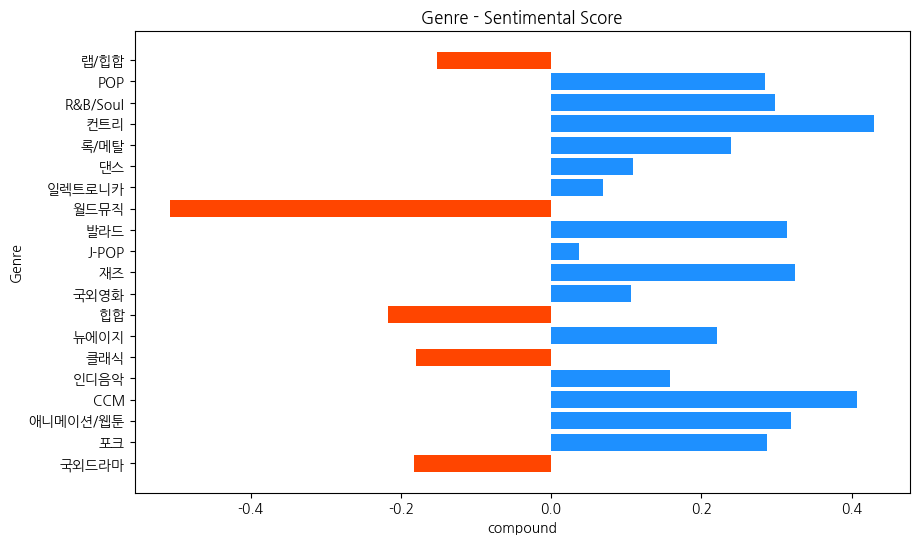

In [ ]:
plt.figure(figsize=(10, 6))
y = np.arange(20)
clrs = ['#1E90FF' if x > 0 else '#FF4500' for x in df_genre.compound]
plt.barh(df_genre.Genre_1, df_genre.compound, color = clrs)

plt.xlabel('compound')
plt.ylabel('Genre')
plt.title('Genre - Sentimental Score')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
data.to_csv("final_data_senti.csv")

## bpm - sentimental

In [ ]:
df_B =  data

In [ ]:
df_B = df_B.drop_duplicates(subset = ['Title', 'Artist'])

In [ ]:
df_B.columns

Index(['Year', 'Month', 'Week', 'Rank', 'Title', 'Artist', 'Lyrics', 'Genre',
       'BPM', 'Duration_sec', 'color1', 'color2', 'color3', 'rgb1', 'rgb2',
       'rgb3', 'Featuring', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

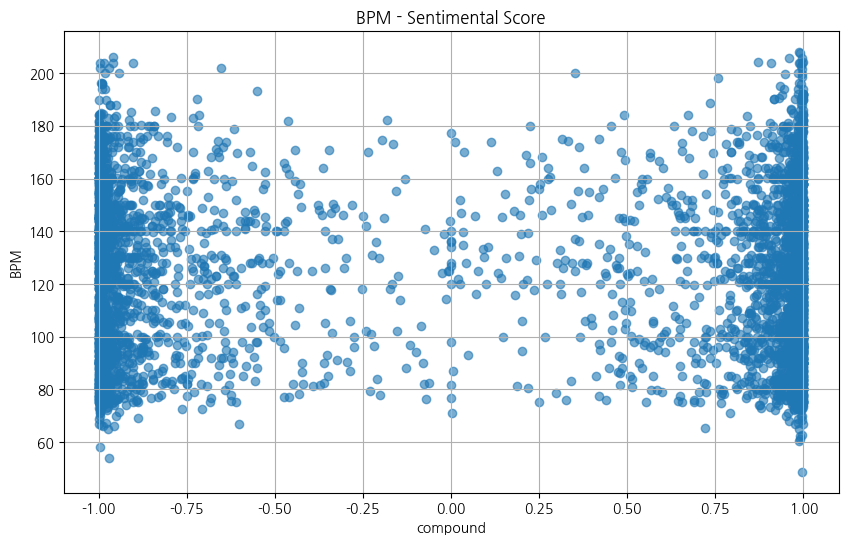

In [ ]:
x = df_B['compound']
y = df_B['BPM']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6)

plt.xlabel('compound')
plt.ylabel('BPM')
plt.title('BPM - Sentimental Score')
plt.grid()
plt.show()

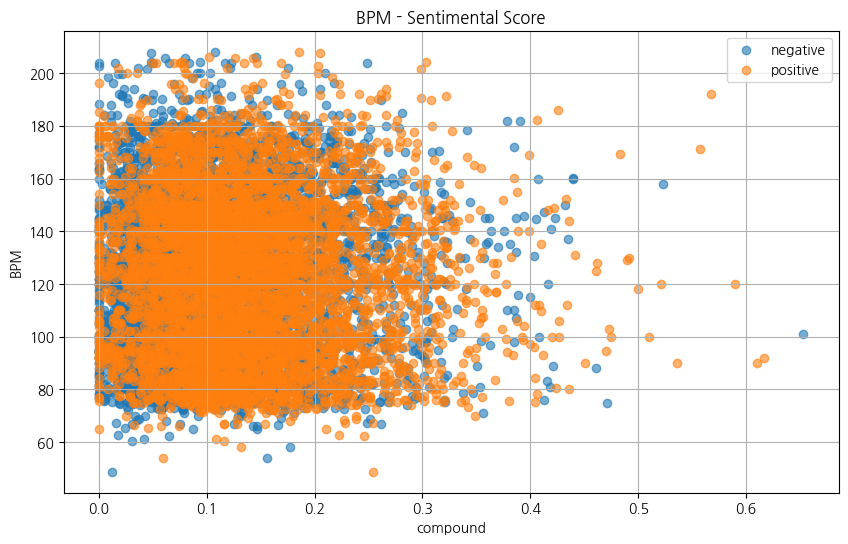

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_B['neg'], df_B['BPM'], alpha=0.6, label = 'negative')
plt.scatter(df_B['pos'], df_B['BPM'], alpha = 0.6, label = 'positive')
plt.xlabel('compound')
plt.ylabel('BPM')
plt.title('BPM - Sentimental Score')
plt.grid()
plt.legend()
plt.show()

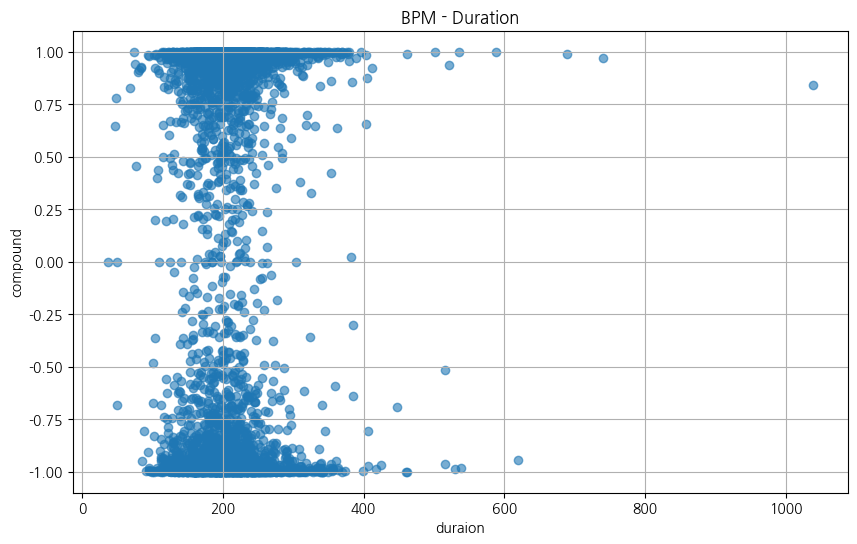

In [ ]:
x = df_B['Duration_sec']
y = df_B['compound']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6)

plt.xlabel('duraion')
plt.ylabel('compound')
plt.title('BPM - Duration')
plt.grid()
plt.show()

# TF-IDF

## 빈도 확인

In [ ]:
df = tfidf

In [ ]:
df.head()

year  month  doc_num  keyword  TF-IDF
0  2014      1        0       oh  0.2893
1  2014      1        0    crazy  0.2816
2  2014      1        0  monster  0.2603
3  2014      1        1  wooooah  0.6140
4  2014      1        1   timber  0.5372

In [ ]:
exclusion_list = ['wooooah','oh', 'yeah', 'ooh','woooah', 'woo', 'la', 'na', 'hey', 'uh', 'ha']

filtered_df = df[~df['keyword'].isin(exclusion_list)]

filtered_df.head()

year  month  doc_num   keyword  TF-IDF
1  2014      1        0     crazy  0.2816
2  2014      1        0   monster  0.2603
4  2014      1        1    timber  0.5372
5  2014      1        1     going  0.2601
6  2014      1        2  counting  0.4355

In [ ]:
top10_keyword = filtered_df.keyword.value_counts().reset_index().head(10).keyword
top10_keyword = list(top10_keyword)
top10_keyword

['love',
 'nigga',
 'like',
 'want',
 'know',
 'baby',
 'wanna',
 'bitch',
 'gonna',
 'let']

## 워드 클라우드

### 전체

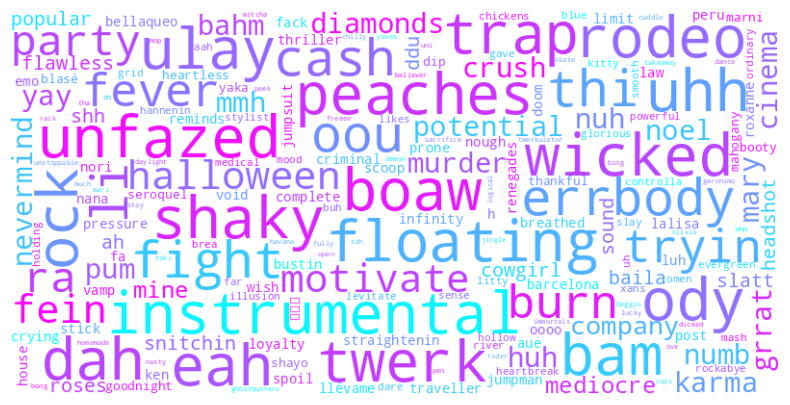

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tfidf_dict = {k: v for k, v in zip(tfidf['keyword'], tfidf['TF-IDF'])}

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'cool', max_font_size = 60).generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 년도별

## 키워드 트렌드 라인 그래프

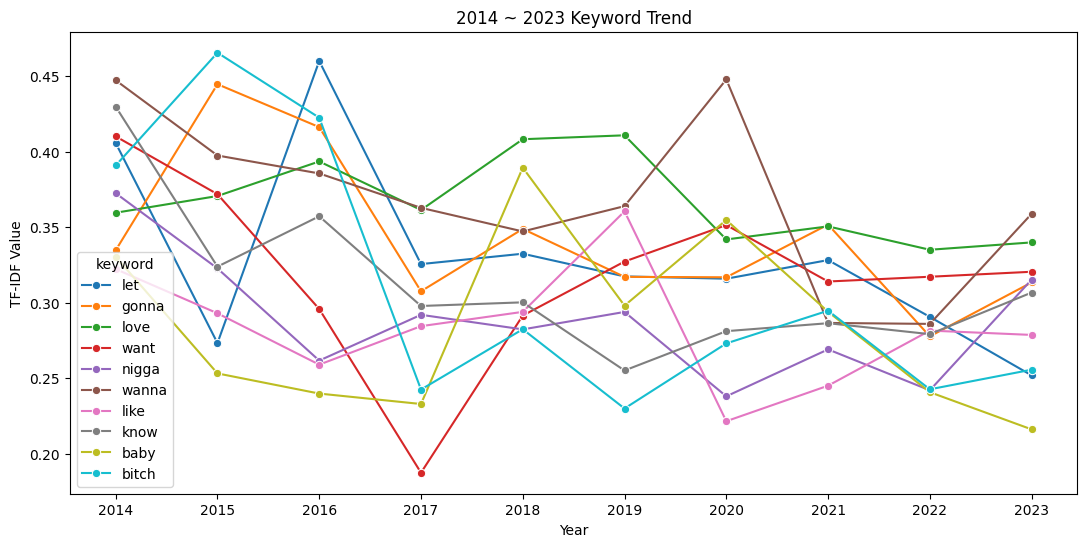

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = tfidf[tfidf['keyword'].isin(top10_keyword)]

plt.figure(figsize=(13, 6))
sns.lineplot(x='year', y='TF-IDF', hue='keyword', data=filtered_df, marker = 'o', errorbar=None)

plt.title('2014 ~ 2023 Keyword Trend')
plt.xlabel('Year')
plt.xticks(range(2014, 2024))
plt.ylabel('TF-IDF Value')
plt.show()

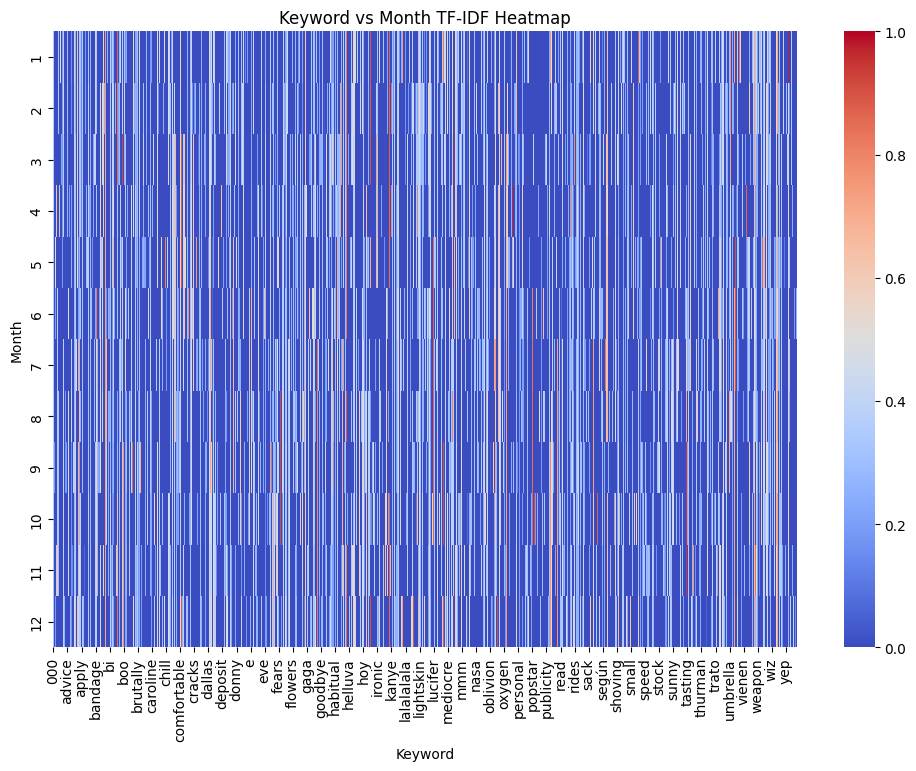

In [ ]:
# 월별 키워드와 TF-IDF 값의 평균 계산
keyword_month_avg = filtered_df.groupby(['month', 'keyword'])['TF-IDF'].mean().unstack().fillna(0)

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(keyword_month_avg, cmap='coolwarm', annot=False, cbar=True)
plt.title('Keyword vs Month TF-IDF Heatmap')
plt.xlabel('Keyword')
plt.ylabel('Month')
plt.show()

키워드 간 동시등장 네트워크

In [ ]:
import itertools

In [ ]:
filtered_df_2014 = filtered_df[filtered_df.year == 2014]

In [ ]:
filtered_df

year  month  doc_num keyword  TF-IDF
20      2014      1        6     let  0.3008
38      2014      1       12   gonna  0.1615
49      2014      1       16    love  0.3170
58      2014      1       19    love  0.2555
66      2014      1       22    want  0.6850
...      ...    ...      ...     ...     ...
312416  2023     12      457    love  0.1757
312447  2023     12      467    want  0.3660
312468  2023     12      474    know  0.2299
312512  2023     12      489    like  0.2987
312543  2023     12      499    love  0.2931

[18666 rows x 5 columns]

In [ ]:
import itertools

<ipython-input-17-1f7a3af8681f>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G.add_edge(row[0][0], row[0][1], weight=row['count'])


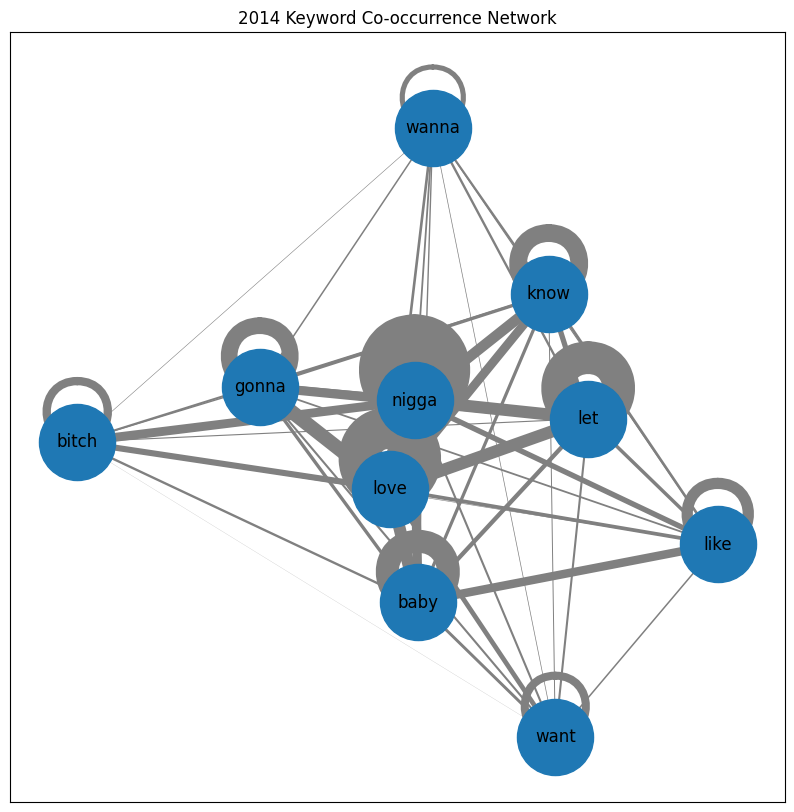

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 같은 문서에 등장한 키워드 페어 만들기
keyword_pairs = (filtered_df_2014.groupby('doc_num')['keyword']
                 .apply(lambda x: pd.Series(list(itertools.combinations(x, 2))))
                 .reset_index(drop=True))

# 페어의 빈도 계산
keyword_pair_counts = keyword_pairs.value_counts().reset_index(name='count')

# 네트워크 그래프 만들기
G = nx.Graph()
for i, row in keyword_pair_counts.iterrows():
    G.add_edge(row[0][0], row[0][1], weight=row['count'])

# 시각화
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, font_size=12, edge_color='grey', width=[G[u][v]['weight']*0.1 for u,v in G.edges()])
plt.title('2014 Keyword Co-occurrence Network')
plt.show()


<Figure size 1000x600 with 0 Axes>

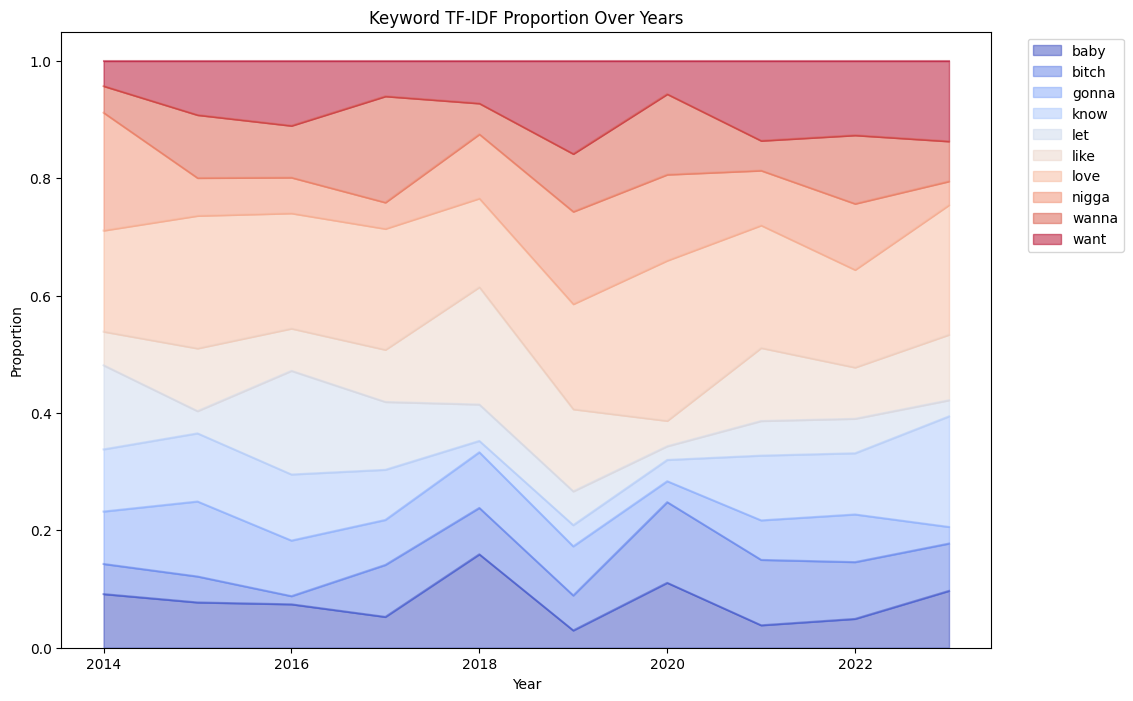

In [ ]:
# 연도별 키워드 비율 변화(누적 영역 차트)
import seaborn as sns
import matplotlib.pyplot as plt

# 연도별로 상위 키워드의 TF-IDF 값 계산
keyword_tfidf_year = filtered_df.groupby(['year', 'keyword'])['TF-IDF'].sum().unstack().fillna(0)

# 데이터 정규화(비율로 변환)
keyword_tfidf_year_percentage = keyword_tfidf_year.div(keyword_tfidf_year.sum(axis=1), axis=0)

# 누적 영역 그래프
plt.figure(figsize=(10, 6))
keyword_tfidf_year_percentage.plot.area(alpha=0.5, figsize=(12, 8), cmap='coolwarm', stacked=True)
plt.title('Keyword TF-IDF Proportion Over Years')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [ ]:
# 연도별 키워드-감정 연관성 분석
import seaborn as sns
import matplotlib.pyplot as plt

# 감정 점수(positive, neutral, negative)를 기준으로 키워드별 평균 감정 점수 계산
keyword_sentiment_avg = filtered_df.groupby('keyword')[['pos', 'neu', 'neg']].mean()

# 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(keyword_sentiment_avg, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Average Sentiment Scores by Keyword')
plt.xlabel('Sentiment Type')
plt.ylabel('Keyword')
plt.show()

KeyError: "Columns not found: 'pos', 'neg', 'neu'"

In [ ]:
# 감정 점수에 따른 키워드 클러스터링
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 키워드별 감정 점수 피벗 테이블 생성
keyword_sentiment = filtered_df.groupby('keyword')[['positive_score', 'neutral_score', 'negative_score']].mean()

# PCA로 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(keyword_sentiment)

# PCA 결과를 데이터프레임에 추가
keyword_sentiment['pca1'] = pca_result[:, 0]
keyword_sentiment['pca2'] = pca_result[:, 1]

# 클러스터 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', data=keyword_sentiment, palette='cool', s=100)
plt.title('Keyword Sentiment Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


## 키워드-순위 상관관계

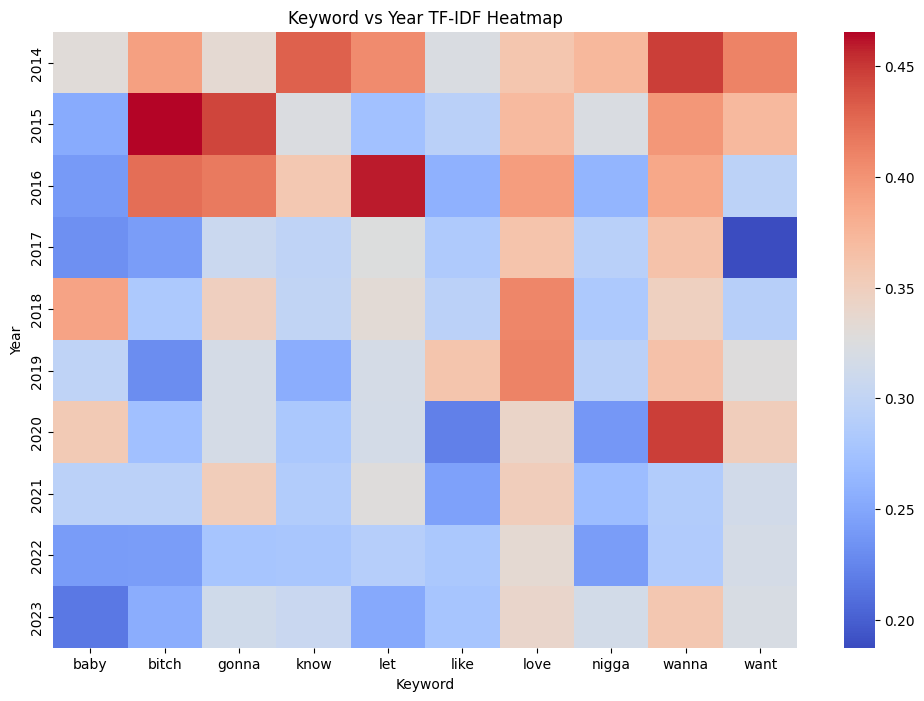

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

keyword_tfidf_avg = filtered_df.groupby(['year', 'keyword'])['TF-IDF'].mean().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(keyword_tfidf_avg, cmap='coolwarm', annot=False, cbar=True)

plt.title('Keyword vs Year TF-IDF Heatmap')
plt.xlabel('Keyword')
plt.ylabel('Year')
plt.show()

## 키워드 클러스터링 및 임베딩 시각화(PCA)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비: 특정 연도의 TF-IDF 값으로 벡터화된 데이터 사용
pivot_df = filtered_df.pivot_table(index='doc_num', columns='keyword', values='TF-IDF').fillna(0)

# PCA로 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_df)

# PCA 결과를 데이터프레임에 추가
pivot_df['pca1'] = pca_result[:, 0]
pivot_df['pca2'] = pca_result[:, 1]
pivot_df

keyword      baby      know      like     love   nigga       que      want  \
doc_num                                                                      
0        0.216260  0.298825  0.333200  0.37886  0.2784  0.373480  0.381457   
1        0.234600  0.296500  0.282950  0.37410  0.0000  0.335900  0.179000   
2        0.226420  0.000000  0.318343  0.44900  0.2638  0.345600  0.330067   
3        0.247750  0.000000  0.277667  0.33364  0.2652  0.388100  0.353200   
4        0.269650  0.000000  0.195400  0.32590  0.2212  0.406950  0.472700   
...           ...       ...       ...      ...     ...       ...       ...   
495      0.000000  0.000000  0.000000  0.00000  0.1579  0.350233  0.334600   
496      0.000000  0.000000  0.000000  0.56840  0.1965  0.392700  0.339900   
497      0.298167  0.000000  0.234000  0.00000  0.0000  0.387300  0.349200   
498      0.284700  0.197000  0.211600  0.24530  0.3339  0.339800  0.000000   
499      0.000000  0.196550  0.000000  0.34860  0.2228  0.575900  0.000000   

keyword      pca1      pca2  
doc_num                      
0        0.163709 -0.119650  
1       -0.016475 -0.056543  
2        0.012670 -0.087614  
3        0.003777 -0.076440  
4        0.043276 -0.118741  
...           ...       ...  
495     -0.339069 -0.172343  
496     -0.153929 -0.230242  
497     -0.139251 -0.067689  
498     -0.104953  0.184241  
499     -0.230894 -0.086908  

[500 rows x 9 columns]

<ipython-input-35-033b8b4f9904>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='pca1', y='pca2', data=pivot_df, palette='cool', s=100)


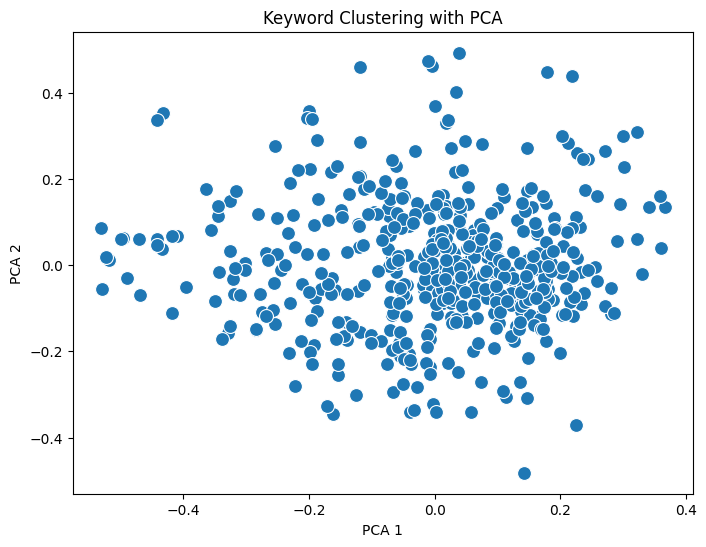

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 준비: 특정 연도의 TF-IDF 값으로 벡터화된 데이터 사용
# 전체 데이터로 할 경우 'year'를 포함하지 않고 바로 피벗
pivot_df = filtered_df.pivot_table(index='doc_num', columns='keyword', values='TF-IDF').fillna(0)

# PCA로 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_df)

# PCA 결과를 데이터프레임에 추가
pivot_df['pca1'] = pca_result[:, 0]
pivot_df['pca2'] = pca_result[:, 1]

# 클러스터 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', data=pivot_df, palette='cool', s=100)

# 스타일링
plt.title('Keyword Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 네트워크 그래프

In [ ]:
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/project/C:/Windows/Fonts/malgun.ttf'

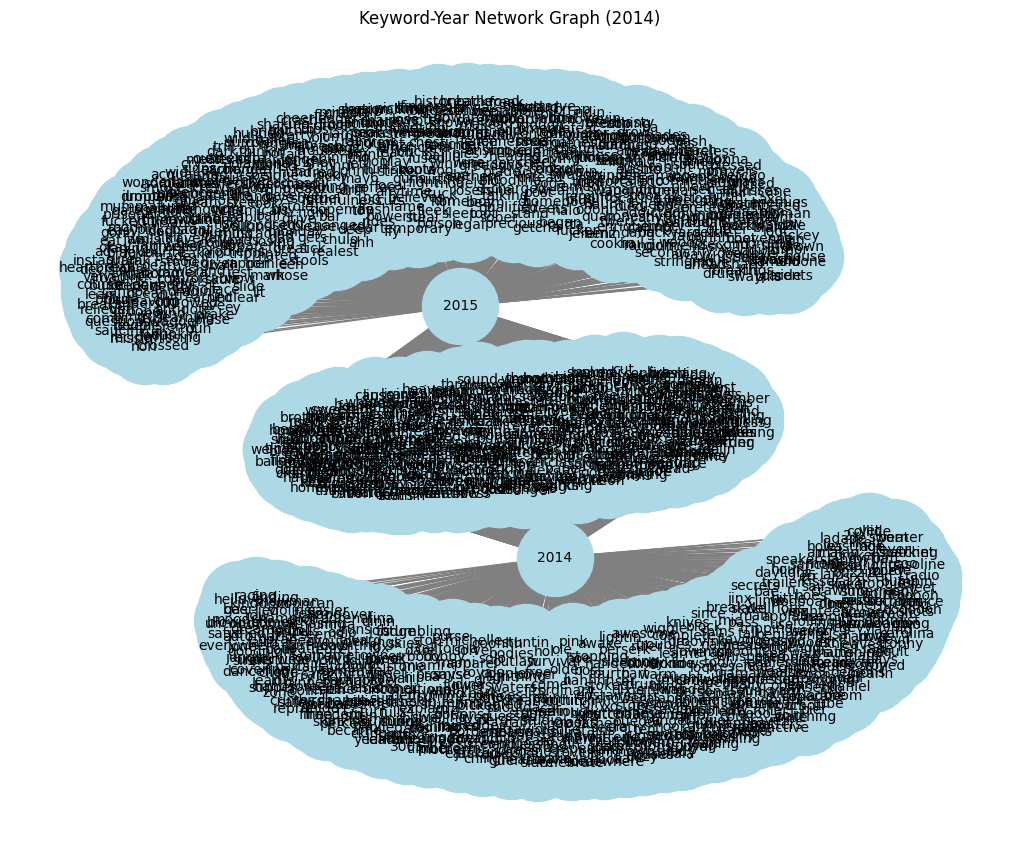

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

filtered_df_1 = tfidf[tfidf['year'].between(2014, 2015)]

# 네트워크 그래프 생성
G = nx.Graph()

# 노드와 엣지 추가
for _, row in filtered_df_1.iterrows():
    G.add_edge(row['year'], row['keyword'])

# 그래프 그리기
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, edge_color='gray', node_size=3000)
plt.title('Keyword-Year Network Graph (2014~2015)')
plt.show()

# 기타

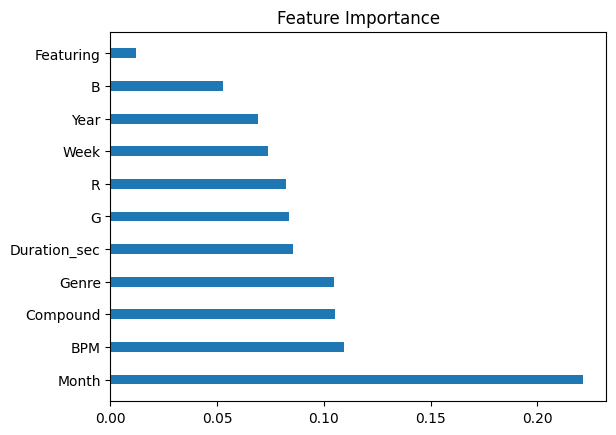

In [10]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(11)
cols = ['Month', 'BPM', 'Compound', 'Genre', 'Duration_sec', 'G', 'R', 'Week', 'Year', 'B', 'Featuring']
values = [0.2214, 0.1093, 0.1054, 0.1046, 0.0854, 0.0838, 0.0821, 0.0736, 0.0691, 0.0529, 0.0120]

plt.barh(y, values, height = 0.3)
plt.yticks(y, cols)
plt.title('Feature Importance')
plt.show()
